<a href="https://colab.research.google.com/github/Smar-na/FemTech-/blob/main/UNI%2CBI%2CTRIGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.utils import shuffle

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")

# Ensure 'content' column is in string format for processing
df['content'] = df['content'].astype(str)

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Tokenize the text with explicit word_tokenize function
df['tokens'] = df['content'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Group reviews by rating
group_123 = df[df['score'].isin([1, 2, 3])].reset_index(drop=True)
group_45 = df[df['score'].isin([4, 5])].reset_index(drop=True)

# Define a function to create and deduplicate bigrams for a group
def generate_unique_bigrams(df_group):
    # Create bigrams
    bigram_phrases = Phrases(df_group['tokens'], min_count=5, threshold=10)
    bigram = Phraser(bigram_phrases)

    # Apply bigram transformation and deduplicate
    df_group['bigrams'] = df_group['tokens'].apply(lambda x: list(set(bigram[x])))

    # Shuffle for randomness and ensure unique bigrams across the group
    df_group = shuffle(df_group).reset_index(drop=True)
    unique_bigrams = []
    for bigram_list in df_group['bigrams']:
        for bg in bigram_list:
            if bg not in unique_bigrams:
                unique_bigrams.append(bg)
    return unique_bigrams

# Generate unique bigrams for each group
unique_bigrams_123 = generate_unique_bigrams(group_123)
unique_bigrams_45 = generate_unique_bigrams(group_45)

# Display results
print("Unique Bigrams for Ratings 1, 2, 3:")
for bg in unique_bigrams_123:
    print(bg)

print("\nUnique Bigrams for Ratings 4, 5:")
for bg in unique_bigrams_45:
    print(bg)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Streaming output truncated to the last 5000 lines.
análisis
accurate.😊
bewn
4-stars
unregularly
storms
depression/anxiety
exspect
Love.this
pervious
tomboy
easy-
LAST
y3old
preety
TOM
period/menstruation
❤🤗
muuuy
notication
McKenna
Nb
yh
nauseatingly
distribution
foresee
medics
😎💏
gender💛💙💜💚❤
asume
greatness
Simpke
freedom
body.p
MmmMmmm
gOoOod
priddy
💕💖💕
perfectionnn
it😄👍
circulation
bern
NotPink
introduction
tracking/predictions
foolproof
7-9
witchcraft
pointed
Ovarys
drunk
uh
Amazin
concentration/focus
vibrations
acount
jan
conec
Watery
Discharge
peddling
praise😄
Permanent
🙌🏿
imbarassing
relavent
Ps-
zillion
works.you
+ve
transient
BJJ
linking
lumped
vaccine
available-even
vaccination
vaccinations
compiled
likelihood
foreseeable
booster
understandstanding
☺💯
💗♥️💖
Windows
Phone
GREAAAAT
mabye
cllue
lobe
usig
adaptando
I'ce
botheration
Identifying
ref
amazing.😘😘😙😙😊😊😊
Specific
15+
etonogestrel
gresr
cringy
👌☀️
tried😂
Ferenheit
versatility
circuit
Mom
fertle
more😍🤣💜
optimum
timeliness
p

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.utils import shuffle

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")

# Ensure 'content' column is in string format for processing
df['content'] = df['content'].astype(str)

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Tokenize, remove stopwords, and clean text using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())  # lowercase the text
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # lemmatize, remove stopwords and non-alphabetic words
    return tokens

# Apply preprocessing to each review
df['tokens'] = df['content'].apply(preprocess_text)

# Group reviews by rating
group_123 = df[df['score'].isin([1, 2, 3])].reset_index(drop=True)
group_45 = df[df['score'].isin([4, 5])].reset_index(drop=True)

# Define a function to create and deduplicate bigrams for a group
def generate_unique_bigrams(df_group):
    # Create bigrams
    bigram_phrases = Phrases(df_group['tokens'], min_count=3, threshold=10)
    bigram = Phraser(bigram_phrases)

    # Apply bigram transformation and deduplicate
    df_group['bigrams'] = df_group['tokens'].apply(lambda x: list(set(bigram[x])))

    # Shuffle for randomness and ensure unique bigrams across the group
    df_group = shuffle(df_group).reset_index(drop=True)
    unique_bigrams = []
    for bigram_list in df_group['bigrams']:
        for bg in bigram_list:
            if bg not in unique_bigrams:
                unique_bigrams.append(bg)
    return unique_bigrams

# Generate unique bigrams for each group
unique_bigrams_123 = generate_unique_bigrams(group_123)
unique_bigrams_45 = generate_unique_bigrams(group_45)

# Display results
print("Unique Bigrams for Ratings 1, 2, 3:")
for bg in unique_bigrams_123:
    print(bg)

print("\nUnique Bigrams for Ratings 4, 5:")
for bg in unique_bigrams_45:
    print(bg)


Streaming output truncated to the last 5000 lines.
bi
snippet
whith
rag
retrasa
amen
mth
íts
wierd
accutate
probability
reporting
forma
tre
mis_ciclos
una_muy
utilizado
stressor
environmental
likelyhood
quede
ayudado
nacimiento
esacto
cheat
molesto
diferente
nadititita
informada
stupidly
suble
recomiendo_mucho
mancharte
preocupar
attached
fantasticly
girlpower
expdcte
frecuently
sadvice
cutesie
grrat
cram
una_excelente
stigma
kat
certify
humorous
gemacht
installieren
wenn
hat
angehalten
dann
irgendwie
deinstalliert
kommt
mein
als
meldung
warum
dieser
coordination
clumsiness
reflex
evry
portuguese
flesh
admire
infographic
breakup
وموسیقی
کلاسیک
از
بختیاری
لرستان
موسیقی
ومحلی
ایکاش
اهنگ
همه
ایرانی
مسعود
برنامه
بیشتر
وبختیاری
عالیست
های
شما
باشید
region
aan
glare
ang
resantly
seguir
etapas
comprenderlo
amze
behaving
fashioned
preciosa
y_los
consejos
detallado
adecuado
prosise
muuuuhhhhaaaaa
whish
hippy
wiencey
dippy
technological
depot
maturity
upsell
relavant
consultant
regular_basis
pai

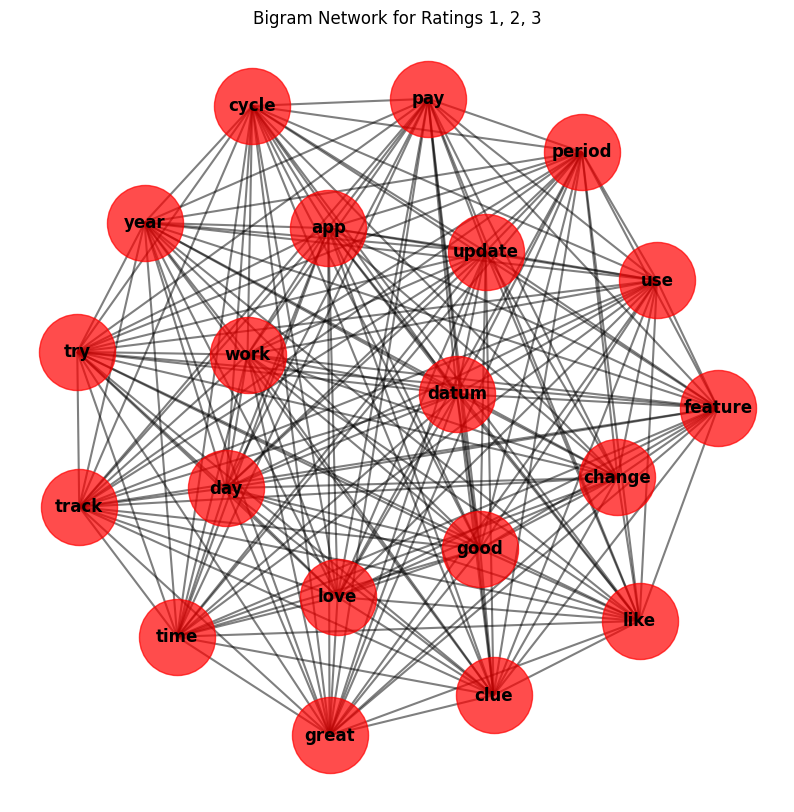

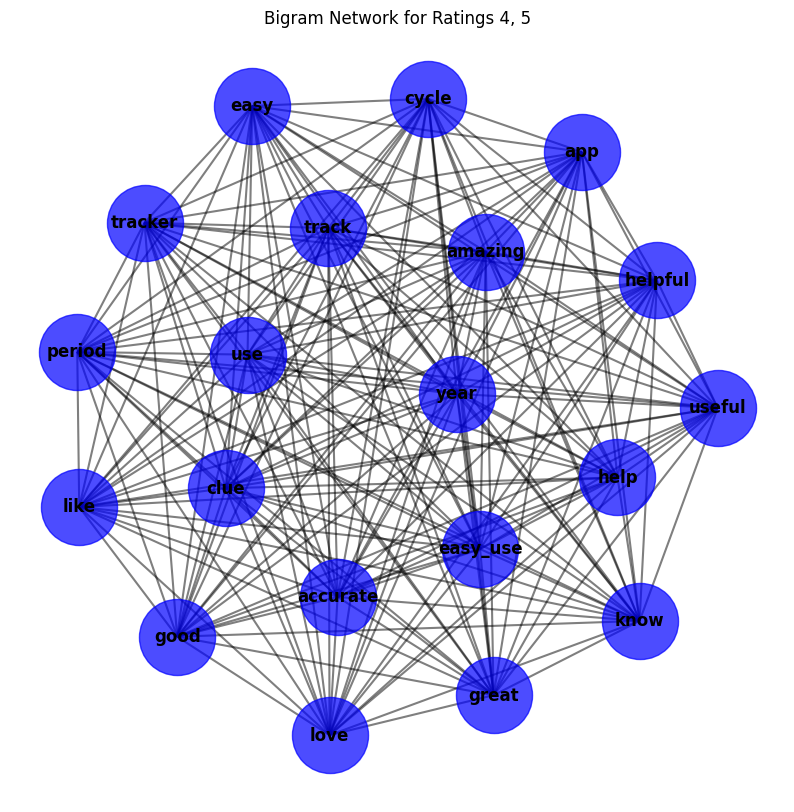

In [ ]:
import pandas as pd
import spacy
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Load and preprocess data (using spaCy as before)
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")
df['content'] = df['content'].astype(str)

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens

df['tokens'] = df['content'].apply(preprocess_text)

# Group reviews by rating
group_123 = df[df['score'].isin([1, 2, 3])].reset_index(drop=True)
group_45 = df[df['score'].isin([4, 5])].reset_index(drop=True)

def generate_bigrams(df_group):
    bigram_phrases = Phrases(df_group['tokens'], min_count=3, threshold=10)
    bigram = Phraser(bigram_phrases)
    df_group['bigrams'] = df_group['tokens'].apply(lambda x: list(set(bigram[x])))
    return df_group

group_123 = generate_bigrams(group_123)
group_45 = generate_bigrams(group_45)

# Function to build and visualize the bigram network graph
def plot_bigram_network(df_group, title, color):
    # Flatten the list of bigram lists
    bigrams = [bigram for sublist in df_group['bigrams'] for bigram in sublist]

    # Get the most common bigrams and filter the top 20 for clarity
    bigram_counts = Counter(bigrams)
    common_bigrams = [bigram for bigram, count in bigram_counts.most_common(20)]

    # Build a graph with bigrams
    G = nx.Graph()
    for bigram_list in df_group['bigrams']:
        filtered_bigrams = [bg for bg in bigram_list if bg in common_bigrams]
        for i in range(len(filtered_bigrams)):
            for j in range(i + 1, len(filtered_bigrams)):
                G.add_edge(filtered_bigrams[i], filtered_bigrams[j])

    # Draw the network graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # for consistent layout
    nx.draw_networkx_nodes(G, pos, node_color=color, node_size=3000, alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    plt.title(title)
    plt.axis("off")
    plt.show()

# Visualize bigram networks for each group
plot_bigram_network(group_123, "Bigram Network for Ratings 1, 2, 3", color='red')
plot_bigram_network(group_45, "Bigram Network for Ratings 4, 5", color='blue')


In [ ]:
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# BIGRAMS


1.   1,2,3 BIGRAMS, THEN REVIEWS FOR THESE BIGRAMS, REVIEWS WITH REPLIES FOR THE SAME
2.  1,2,3 BIGRAMS, THEN REVIEWS FOR THESE BIGRAMS, REVIEWS WITH REPLIES FOR THE SAME



In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import bigrams, FreqDist
from nltk.tokenize import word_tokenize
import string

# Force download to ensure punkt is fully loaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Load dataset (assuming the file is named 'clue.csv' and has 'content' and 'score' columns)
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")
df['content'] = df['content'].astype(str)

# Preprocess text
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    # Handle cases where text might not be a string
    if not isinstance(text, str):
        return []

    # Tokenize the text and convert to lowercase
    try:
        tokens = word_tokenize(text.lower())
        # Filter out non-alphabetic tokens, stopwords, and punctuation
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []

    return tokens
# Apply tokenization and preprocessing
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and ratings 4-5
group_123 = df[df['score'].isin([1, 2, 3])]
group_45 = df[df['score'].isin([4, 5])]

# Function to extract bigrams and get top bigram frequencies
def extract_bigrams(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    bigram_list = list(bigrams(all_tokens))
    bigram_freq = FreqDist(bigram_list)
    return bigram_freq.most_common(10)  # Return top 10 bigrams

# Extract bigrams for each group
bigrams_123 = extract_bigrams(group_123['tokens'])
bigrams_45 = extract_bigrams(group_45['tokens'])

# Display the most common bigrams for each group
print("Most common bigrams for ratings 1, 2, 3:")
for bigram, freq in bigrams_123:
    print(f"{bigram[0]} {bigram[1]}: {freq}")

print("\nMost common bigrams for ratings 4, 5:")
for bigram, freq in bigrams_45:
    print(f"{bigram[0]} {bigram[1]}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Most common bigrams for ratings 1, 2, 3:
using app: 651
new update: 530
app years: 505
love app: 423
used app: 383
every time: 323
use app: 320
open app: 317
clue plus: 305
fertile window: 299

Most common bigrams for ratings 4, 5:
easy use: 4793
love app: 3604
great app: 3533
keep track: 2185
track period: 1335
good app: 1327
using app: 1155
app really: 1062
really helpful: 1040
app great: 1033


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


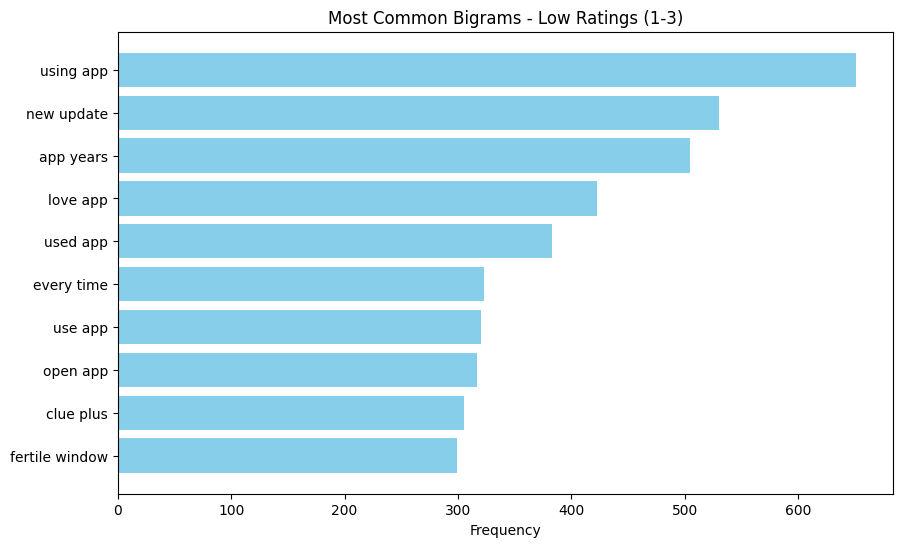

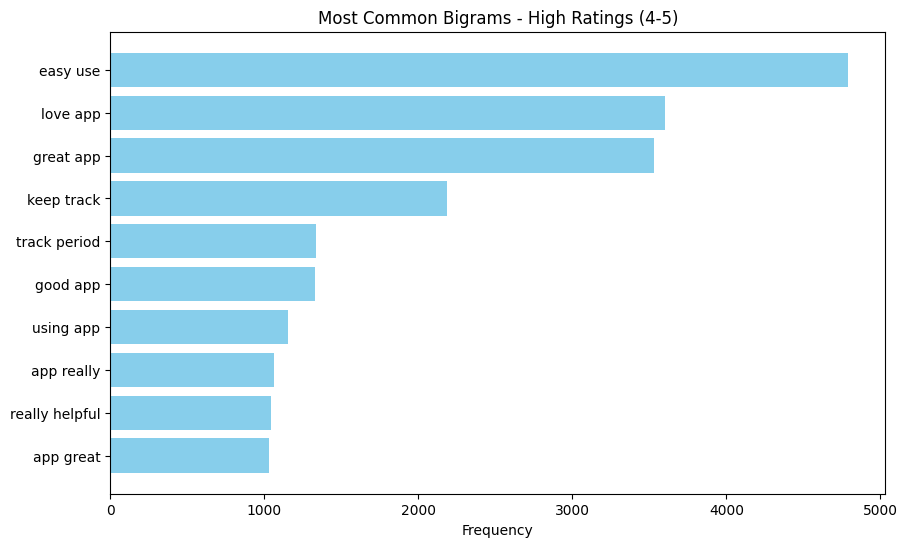

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract bigrams and plot the frequency
def plot_bigrams(df_group, title="Bigrams"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]
    bigrams = list(ngrams(all_tokens, 2))  # Extract bigrams
    fdist = FreqDist(bigrams)  # Frequency distribution of bigrams

    # Get the most common bigrams
    common_bigrams = fdist.most_common(10)
    bigram_labels = [' '.join(bigram) for bigram, _ in common_bigrams]
    bigram_freqs = [freq for _, freq in common_bigrams]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(bigram_labels, bigram_freqs, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Most Common Bigrams - {title}')
    plt.gca().invert_yaxis()  # To display the most common bigrams at the top
    plt.show()

# Plot for low ratings (1-3)
plot_bigrams(df_low_rating, title="Low Ratings (1-3)")

# Plot for high ratings (4-5)
plot_bigrams(df_high_rating, title="High Ratings (4-5)")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


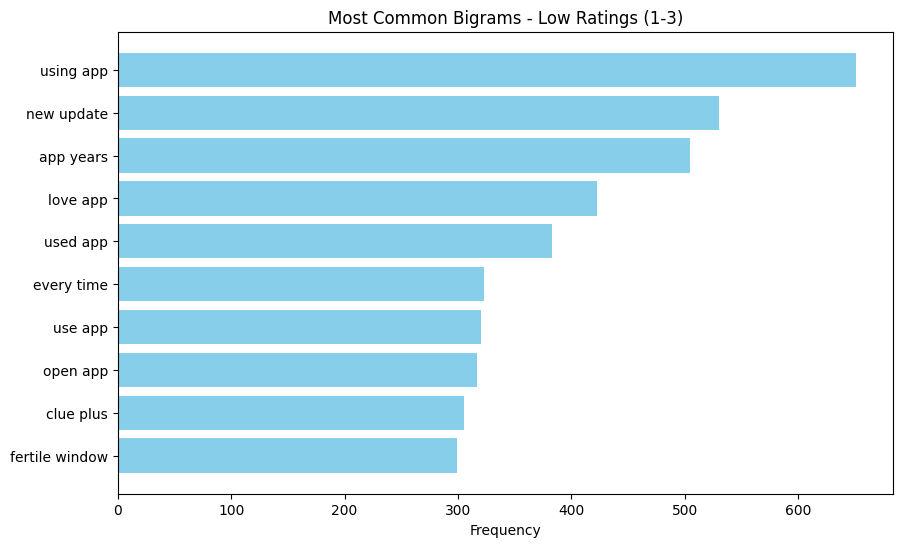

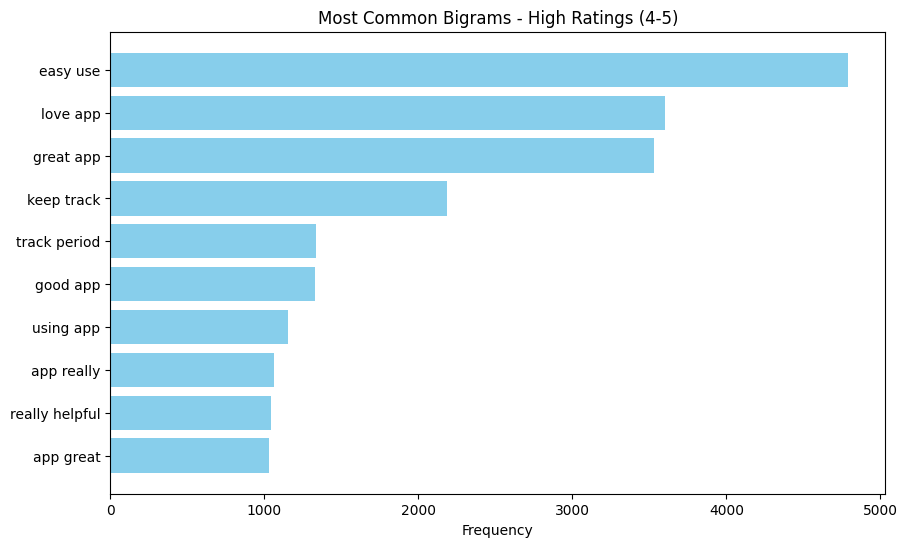

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract and plot non-repetitive bigrams with frequency distribution
def plot_bigrams(df_group, title="Bigrams"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]

    # Extract bigrams and count their frequency using FreqDist
    bigrams = list(ngrams(all_tokens, 2))  # Extract bigrams as a list
    fdist = FreqDist(bigrams)  # Frequency distribution of bigrams

    # Get the most common bigrams
    common_bigrams = fdist.most_common(10)
    bigram_labels = [' '.join(bigram) for bigram, _ in common_bigrams]
    bigram_freqs = [freq for _, freq in common_bigrams]

    # Plot the most common bigrams
    plt.figure(figsize=(10, 6))
    plt.barh(bigram_labels, bigram_freqs, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Most Common Bigrams - {title}')
    plt.gca().invert_yaxis()  # To display the most common bigrams at the top
    plt.show()

# Plot for low ratings (1-3)
plot_bigrams(df_low_rating, title="Low Ratings (1-3)")

# Plot for high ratings (4-5)
plot_bigrams(df_high_rating, title="High Ratings (4-5)")


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract and display the top 10 topics for each bigram
def get_top_topics_for_bigrams(df_group, title="Top Topics for Bigrams"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]

    # Extract bigrams
    bigrams = list(ngrams(all_tokens, 2))  # Extract bigrams as a list
    fdist = FreqDist(bigrams)  # Frequency distribution of bigrams

    # Get the top 10 most common bigrams
    common_bigrams = fdist.most_common(10)

    print(f"\nTop 10 Bigrams and Associated Topics - {title}:")

    # For each bigram, extract and print reviews that contain it
    for bigram, freq in common_bigrams:
        bigram_str = ' '.join(bigram)
        print(f"\nBigram: {bigram_str}, Frequency: {freq}")

        # Get reviews containing the bigram
        related_reviews = df_group[df_group['tokens'].apply(lambda x: bigram[0] in x and bigram[1] in x)]['content']

        # Print the top 10 reviews associated with this bigram
        print(f"Top 10 Reviews containing '{bigram_str}':")
        for i, review in enumerate(related_reviews.head(10)):
            print(f"{i+1}. {review}")

# Get the top 10 topics for low ratings (1-3)
get_top_topics_for_bigrams(df_low_rating, title="Low Ratings (1-3)")

# Get the top 10 topics for high ratings (4-5)
get_top_topics_for_bigrams(df_high_rating, title="High Ratings (4-5)")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Top 10 Bigrams and Associated Topics - Low Ratings (1-3):

Bigram: using app, Frequency: 651
Top 10 Reviews containing 'using app':
1. Haven't used it yet because of the age restriction. Like i hate this app even without using it. Do you think only 13 yo girls have gotten their periods? There are thousands of people that have gotten them before 13 I hope they try to adjust their policies
2. Loved clue, used it for ages. Now it asks me to pay every 5 seconds and I have to wait to be able to click it away. It is extremely annoying and frankly everytime I open the app it makes me want to delete it. The only reason I still use it is because it has all my data. If you want to start using free Clue I recommend you not to.
3. Like others have said i have no issues with the way the app works, ive been using it for a couple years now. the ads have become sooo annoying. i click pretty much anything and theyre asking me to buy clue plus. its getting really agitating! pretty much everything is lo

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract and display the top 10 topics for each trigram with replies
def get_top_topics_for_trigrams_with_replies(df_group, title="Top Topics for Trigrams with Replies"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]

    # Extract trigrams
    trigrams = list(ngrams(all_tokens, 3))  # Extract trigrams as a list
    fdist = FreqDist(trigrams)  # Frequency distribution of trigrams

    # Get the top 10 most common trigrams
    common_trigrams = fdist.most_common(10)

    print(f"\nTop 10 Trigrams and Associated Topics - {title}:")

    # For each trigram, extract and print reviews that contain it
    for trigram, freq in common_trigrams:
        trigram_str = ' '.join(trigram)
        print(f"\nTrigram: {trigram_str}, Frequency: {freq}")

        # Get reviews containing the trigram
        related_reviews = df_group[df_group['tokens'].apply(lambda x: trigram[0] in x and trigram[1] in x and trigram[2] in x)]

        # Print the top 10 reviews associated with this trigram
        print(f"Top 10 Reviews containing '{trigram_str}':")
        for i, review in enumerate(related_reviews.head(10)['content']):
            # Check if the review has a reply (in 'replycontent' column)
            review_id = related_reviews.iloc[i].name  # Get the index of the review
            reply = df.loc[review_id, 'replyContent']  # Get the corresponding reply

            reply_status = "Has reply" if pd.notna(reply) and reply.strip() != "" else "No reply"

            print(f"{i+1}. {review} -> {reply_status}")

# Get the top 10 topics for low ratings (1-3) with reply check
get_top_topics_for_trigrams_with_replies(df_low_rating, title="Low Ratings (1-3) with Replies")

# Get the top 10 topics for high ratings (4-5) with reply check
get_top_topics_for_trigrams_with_replies(df_high_rating, title="High Ratings (4-5) with Replies")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Top 10 Trigrams and Associated Topics - Low Ratings (1-3) with Replies:

Trigram: using app years, Frequency: 229
Top 10 Reviews containing 'using app years':
1. Like others have said i have no issues with the way the app works, ive been using it for a couple years now. the ads have become sooo annoying. i click pretty much anything and theyre asking me to buy clue plus. its getting really agitating! pretty much everything is locked behind a paywall, no different from most things now 😮‍💨 -> Has reply
2. The whole reason I switched from flo to clue was because the ads for the premium version was too annoying. I've been using it for two years, but recently every time I open the app the whole screen is taken up by full page "choose your plan" and it's super annoying. Let me track my period and go. If this persists I'm gonna have to switch again. And something about monetizing information about women's health rubs me the wrong way.... Are you here to help women or are we just money to you

# TRIGRAMS

1.  1,2,3- TRIGRAMS, REVIEWS, REPLIY FOR THE REVIEWS
2.  4,5- TRIGRAMS, REVIEWS , REPLY FOR THE REVIEWS




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Most Common Trigrams - Low Ratings (1-3):
Trigram: using app years, Frequency: 229
Trigram: used love app, Frequency: 201
Trigram: used app years, Frequency: 175
Trigram: every time open, Frequency: 89
Trigram: using app since, Frequency: 82
Trigram: using clue years, Frequency: 79
Trigram: time open app, Frequency: 73
Trigram: behind pay wall, Frequency: 59
Trigram: period tracking app, Frequency: 57
Trigram: used clue years, Frequency: 53


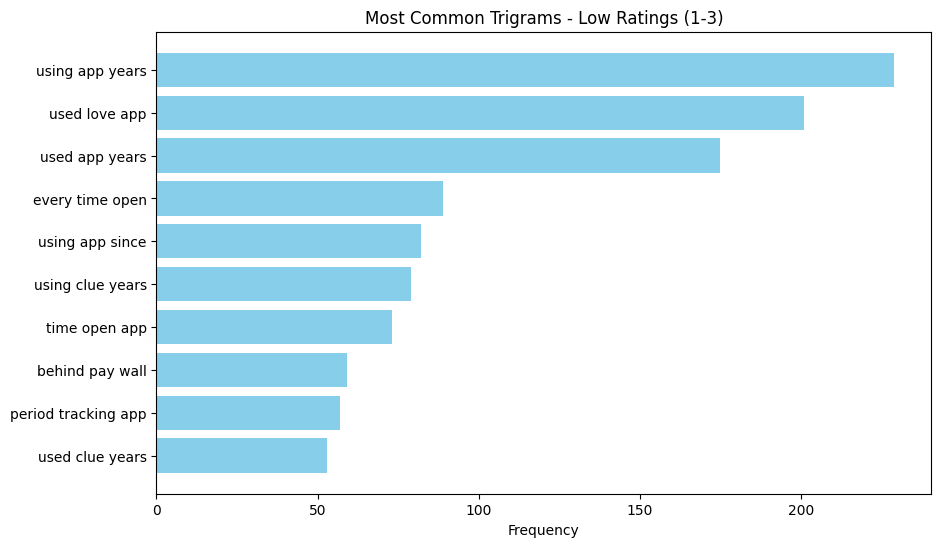


Most Common Trigrams - High Ratings (4-5):
Trigram: helps keep track, Frequency: 663
Trigram: app easy use, Frequency: 636
Trigram: best period tracker, Frequency: 418
Trigram: using app years, Frequency: 360
Trigram: keep track period, Frequency: 323
Trigram: app great app, Frequency: 317
Trigram: helpful easy use, Frequency: 313
Trigram: period tracking app, Frequency: 307
Trigram: easy use love, Frequency: 298
Trigram: keep track cycle, Frequency: 291


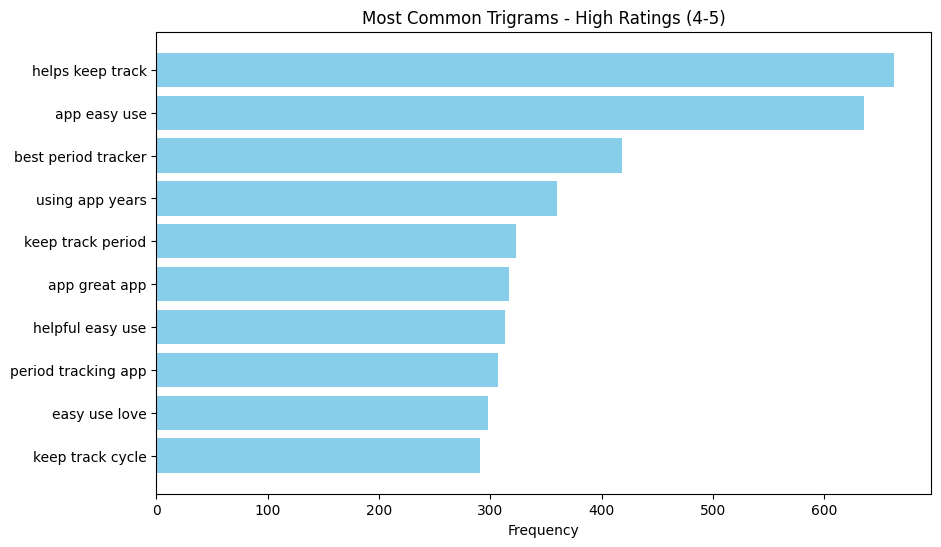

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract and plot non-repetitive trigrams with frequency distribution
def plot_trigrams(df_group, title="Trigrams"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]

    # Extract trigrams and count their frequency using FreqDist
    trigrams = list(ngrams(all_tokens, 3))  # Extract trigrams as a list
    fdist = FreqDist(trigrams)  # Frequency distribution of trigrams

    # Get the most common trigrams
    common_trigrams = fdist.most_common(10)

    # Print the most common trigrams and their frequencies
    print(f"\nMost Common Trigrams - {title}:")
    for trigram, freq in common_trigrams:
        print(f"Trigram: {' '.join(trigram)}, Frequency: {freq}")

    # Get the labels and frequencies for plotting
    trigram_labels = [' '.join(trigram) for trigram, _ in common_trigrams]
    trigram_freqs = [freq for _, freq in common_trigrams]

    # Plot the most common trigrams
    plt.figure(figsize=(10, 6))
    plt.barh(trigram_labels, trigram_freqs, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Most Common Trigrams - {title}')
    plt.gca().invert_yaxis()  # To display the most common trigrams at the top
    plt.show()

# Plot for low ratings (1-3)
plot_trigrams(df_low_rating, title="Low Ratings (1-3)")

# Plot for high ratings (4-5)
plot_trigrams(df_high_rating, title="High Ratings (4-5)")


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract and display the top 10 topics for each trigram
def get_top_topics_for_trigrams(df_group, title="Top Topics for Trigrams"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]

    # Extract trigrams
    trigrams = list(ngrams(all_tokens, 3))  # Extract trigrams as a list
    fdist = FreqDist(trigrams)  # Frequency distribution of trigrams

    # Get the top 10 most common trigrams
    common_trigrams = fdist.most_common(10)

    print(f"\nTop 10 Trigrams and Associated Topics - {title}:")

    # For each trigram, extract and print reviews that contain it
    for trigram, freq in common_trigrams:
        trigram_str = ' '.join(trigram)
        print(f"\nTrigram: {trigram_str}, Frequency: {freq}")

        # Get reviews containing the trigram
        related_reviews = df_group[df_group['tokens'].apply(lambda x: trigram[0] in x and trigram[1] in x and trigram[2] in x)]['content']

        # Print the top 10 reviews associated with this trigram
        print(f"Top 10 Reviews containing '{trigram_str}':")
        for i, review in enumerate(related_reviews.head(10)):
            print(f"{i+1}. {review}")

# Get the top 10 topics for low ratings (1-3)
get_top_topics_for_trigrams(df_low_rating, title="Low Ratings (1-3)")

# Get the top 10 topics for high ratings (4-5)
get_top_topics_for_trigrams(df_high_rating, title="High Ratings (4-5)")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Top 10 Trigrams and Associated Topics - Low Ratings (1-3):

Trigram: using app years, Frequency: 229
Top 10 Reviews containing 'using app years':
1. Like others have said i have no issues with the way the app works, ive been using it for a couple years now. the ads have become sooo annoying. i click pretty much anything and theyre asking me to buy clue plus. its getting really agitating! pretty much everything is locked behind a paywall, no different from most things now 😮‍💨
2. The whole reason I switched from flo to clue was because the ads for the premium version was too annoying. I've been using it for two years, but recently every time I open the app the whole screen is taken up by full page "choose your plan" and it's super annoying. Let me track my period and go. If this persists I'm gonna have to switch again. And something about monetizing information about women's health rubs me the wrong way.... Are you here to help women or are we just money to you?
3. I've been using Clue 

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import string

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to extract and display the top 10 topics for each bigram with replies
def get_top_topics_for_bigrams_with_replies(df_group, title="Top Topics for Bigrams with Replies"):
    all_tokens = [token for sublist in df_group['tokens'] for token in sublist]

    # Extract bigrams
    bigrams = list(ngrams(all_tokens, 2))  # Extract bigrams as a list
    fdist = FreqDist(bigrams)  # Frequency distribution of bigrams

    # Get the top 10 most common bigrams
    common_bigrams = fdist.most_common(10)

    print(f"\nTop 10 Bigrams and Associated Topics - {title}:")

    # For each bigram, extract and print reviews that contain it
    for bigram, freq in common_bigrams:
        bigram_str = ' '.join(bigram)
        print(f"\nBigram: {bigram_str}, Frequency: {freq}")

        # Get reviews containing the bigram
        related_reviews = df_group[df_group['tokens'].apply(lambda x: bigram[0] in x and bigram[1] in x)]

        # Print the top 10 reviews associated with this bigram
        print(f"Top 10 Reviews containing '{bigram_str}':")
        for i, review in enumerate(related_reviews.head(10)['content']):
            # Check if the review has a reply (in 'replycontent' column)
            review_id = related_reviews.iloc[i].name  # Get the index of the review
            reply = df.loc[review_id, 'replyContent']  # Get the corresponding reply

            reply_status = "Has reply" if pd.notna(reply) and reply.strip() != "" else "No reply"

            print(f"{i+1}. {review} -> {reply_status}")

# Get the top 10 topics for low ratings (1-3) with reply check
get_top_topics_for_bigrams_with_replies(df_low_rating, title="Low Ratings (1-3) with Replies")

# Get the top 10 topics for high ratings (4-5) with reply check
get_top_topics_for_bigrams_with_replies(df_high_rating, title="High Ratings (4-5) with Replies")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Top 10 Bigrams and Associated Topics - Low Ratings (1-3) with Replies:

Bigram: using app, Frequency: 651
Top 10 Reviews containing 'using app':
1. Haven't used it yet because of the age restriction. Like i hate this app even without using it. Do you think only 13 yo girls have gotten their periods? There are thousands of people that have gotten them before 13 I hope they try to adjust their policies -> Has reply
2. Loved clue, used it for ages. Now it asks me to pay every 5 seconds and I have to wait to be able to click it away. It is extremely annoying and frankly everytime I open the app it makes me want to delete it. The only reason I still use it is because it has all my data. If you want to start using free Clue I recommend you not to. -> Has reply
3. Like others have said i have no issues with the way the app works, ive been using it for a couple years now. the ads have become sooo annoying. i click pretty much anything and theyre asking me to buy clue plus. its getting really 

# USING **LDA**

1.   1,2,3 - TOPICS
2.   4,5- TOPICS

In [ ]:
!pip install pyLDAvis

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import string
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    try:
        # Tokenize and clean the text
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    except Exception as e:
        print(f"Error processing text: {text} \nError: {e}")
        tokens = []
    return tokens

# Load the CSV file (replace 'clue.csv' with the actual path to your CSV)
df = pd.read_csv('/content/drive/MyDrive/Hsh/clue.csv')

# Preprocess the reviews and store tokens
df['tokens'] = df['content'].apply(preprocess_text)

# Separate reviews into two groups: ratings 1-3 and 4-5
df_low_rating = df[df['score'] <= 3]
df_high_rating = df[df['score'] >= 4]

# Function to get the top 10 topics using LDA
def get_lda_topics(df_group, num_topics=10, title="LDA Topics"):
    # Create a dictionary and a corpus from the reviews
    dictionary = corpora.Dictionary(df_group['tokens'])
    corpus = [dictionary.doc2bow(text) for text in df_group['tokens']]

    # Perform LDA topic modeling
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Print the topics
    print(f"\n{title} - Top {num_topics} Topics:")
    topics = lda.print_topics(num_words=5)  # Show the top 5 words for each topic
    for topic in topics:
        print(topic)

# Get the top 10 topics for low ratings (1-3)
get_lda_topics(df_low_rating, num_topics=10, title="LDA Topics for Low Ratings (1-3)")

# Get the top 10 topics for high ratings (4-5)
get_lda_topics(df_high_rating, num_topics=10, title="LDA Topics for High Ratings (4-5)")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



LDA Topics for Low Ratings (1-3) - Top 10 Topics:
(0, '0.049*"data" + 0.037*"app" + 0.028*"account" + 0.013*"lost" + 0.012*"years"')
(1, '0.067*"behind" + 0.043*"paywall" + 0.018*"wall" + 0.012*"el" + 0.010*"locked"')
(2, '0.045*"update" + 0.037*"app" + 0.028*"new" + 0.017*"use" + 0.016*"used"')
(3, '0.054*"app" + 0.021*"used" + 0.020*"pay" + 0.017*"clue" + 0.016*"free"')
(4, '0.030*"cycle" + 0.027*"options" + 0.020*"track" + 0.020*"symptoms" + 0.016*"like"')
(5, '0.088*"app" + 0.035*"open" + 0.016*"even" + 0.016*"working" + 0.015*"wo"')
(6, '0.032*"que" + 0.029*"la" + 0.025*"de" + 0.018*"widget" + 0.014*"bbt"')
(7, '0.017*"phones" + 0.011*"implant" + 0.010*"rely" + 0.010*"en" + 0.009*"forgot"')
(8, '0.047*"app" + 0.043*"period" + 0.017*"days" + 0.015*"day" + 0.013*"like"')
(9, '0.059*"android" + 0.042*"good" + 0.024*"temperature" + 0.018*"circle" + 0.016*"version"')

LDA Topics for High Ratings (4-5) - Top 10 Topics:
(0, '0.039*"apps" + 0.039*"well" + 0.038*"works" + 0.036*"simple" +

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


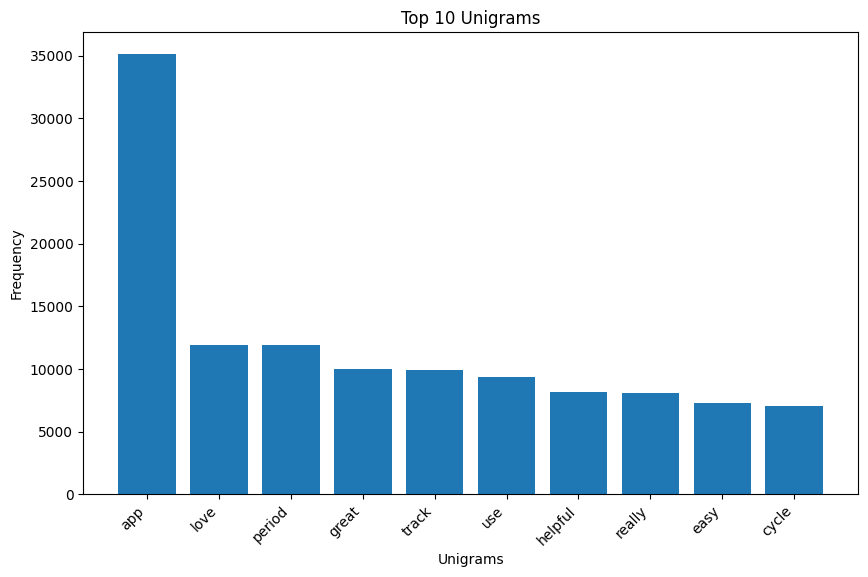

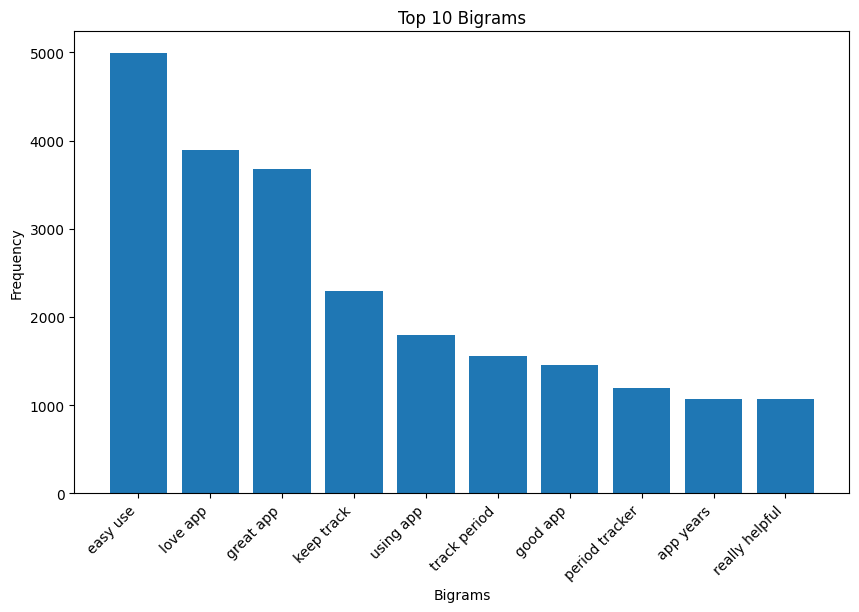

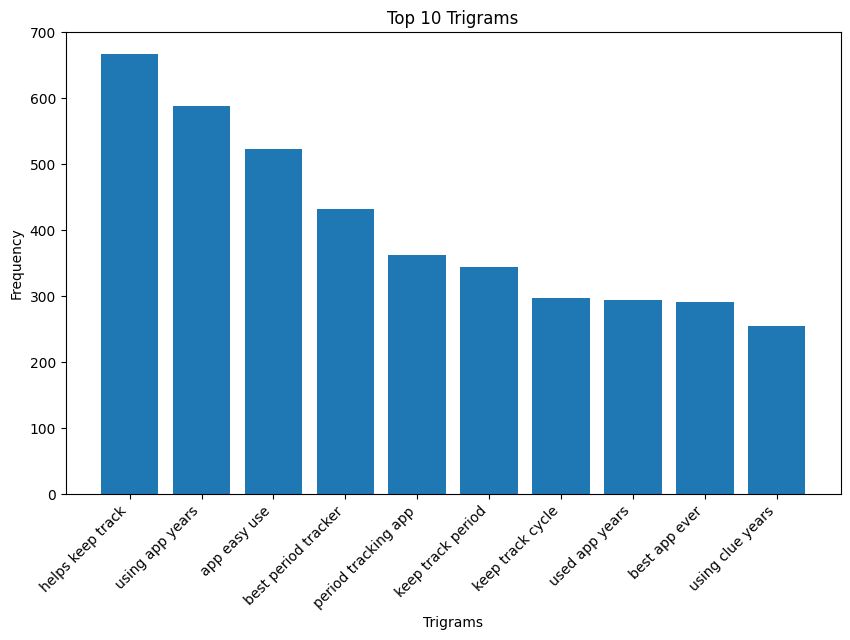

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Preprocess function
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a valid string
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens
    else:
        return []  # Return an empty list for non-string (NaN) entries

# Load dataset (make sure your path is correct)
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")  # Adjust with your actual file path
df['tokens'] = df['content'].apply(preprocess_text)

# Function to extract n-grams
def get_ngrams(texts, n):
    ngrams_list = []
    for text in texts:
        ngrams_list.extend(list(ngrams(text, n)))
    return ngrams_list

# Create unigrams, bigrams, and trigrams
unigrams = get_ngrams(df['tokens'], 1)
bigrams = get_ngrams(df['tokens'], 2)
trigrams = get_ngrams(df['tokens'], 3)

# Combine all n-grams
all_ngrams = unigrams + bigrams + trigrams

# Function to visualize the top N n-grams
def plot_top_ngrams(ngrams, n, title, top_n=10):
    ngram_counts = Counter(ngrams).most_common(top_n)
    labels, values = zip(*ngram_counts)
    labels = [' '.join(gram) for gram in labels]  # Join tuples into strings for display
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} {title}')
    plt.xlabel(f'{title}')
    plt.ylabel('Frequency')
    plt.show()

# Plot the top 10 unigrams, bigrams, and trigrams
plot_top_ngrams(unigrams, 1, 'Unigrams', top_n=10)
plot_top_ngrams(bigrams, 2, 'Bigrams', top_n=10)
plot_top_ngrams(trigrams, 3, 'Trigrams', top_n=10)



In [ ]:
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(all_ngrams)
corpus = [dictionary.doc2bow(ngram) for ngram in all_ngrams]

# Apply LDA
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=10, workers=2)

# Visualize topics with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.443785 -0.132739       1        1  12.270054
9      0.181494 -0.425994       2        1  11.374868
5      0.035129  0.079948       3        1  10.371061
7      0.035917  0.082387       4        1  10.176040
6      0.032462  0.067327       5        1   9.567375
2      0.032197  0.066868       6        1   9.437857
0      0.032106  0.068048       7        1   9.371852
1      0.031651  0.065430       8        1   9.230721
3      0.030731  0.062601       9        1   9.118361
8      0.032097  0.066124      10        1   9.081811, topic_info=          Term           Freq          Total Category  logprob  loglift
7          app  156189.000000  156189.000000  Default  30.0000  30.0000
33      period   73641.000000   73641.000000  Default  29.0000  29.0000
57       track   59989.000000   59989.000000  Default  28.0000  28.0000
6          use   53862.000000   53862.000000  Default  27.0000  27.0000
67       cycle   46526.000000   46526.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
622        ago    2160.973952    2161.592738  Topic10  -4.9452   2.3986
571       hard    2087.250584    2087.869371  Topic10  -4.9799   2.3986
216    section    2058.767095    2059.385888  Topic10  -4.9936   2.3986
601      clear    1963.163605    1963.782388  Topic10  -5.0412   2.3986
2004  previous    1908.612311    1909.231099  Topic10  -5.0693   2.3986

[330 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
76        5  0.999974        able
304       6  0.999900  absolutely
632       1  0.999886     account
69       10  0.999968    accurate
1833      5  0.999822  accurately
...     ...       ...         ...
294       6  0.999994       would
286       9  0.999943       wrong
245       6  0.999846        year
64        1  0.999931       years
38        6  0.999818         yet

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 6, 8, 7, 3, 1, 2, 4, 9])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


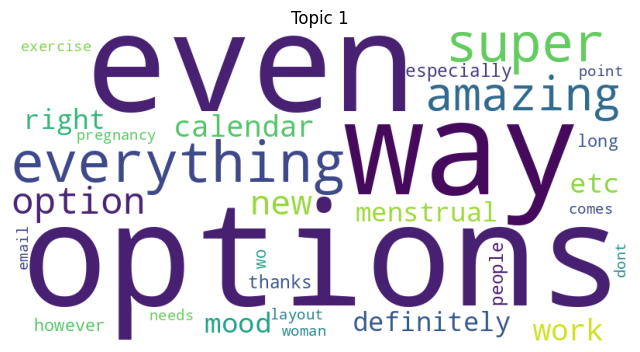

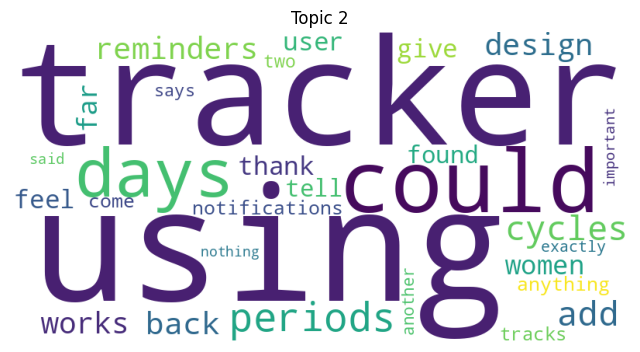

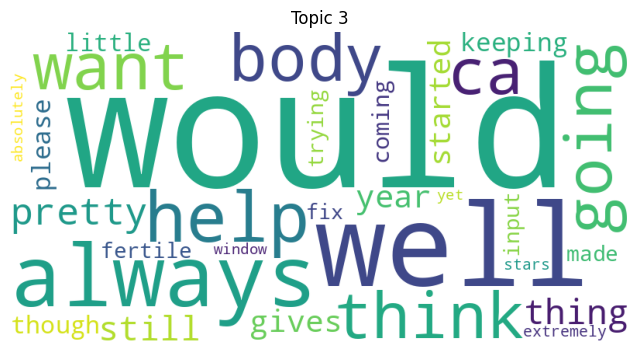

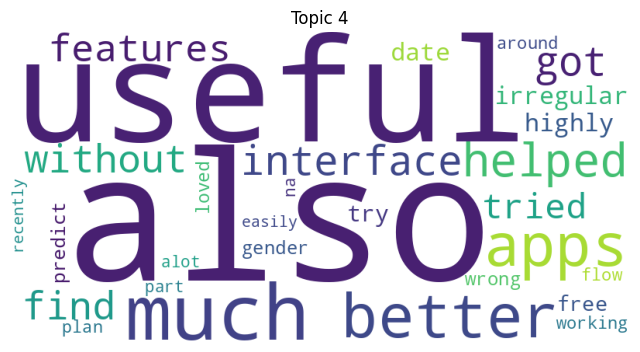

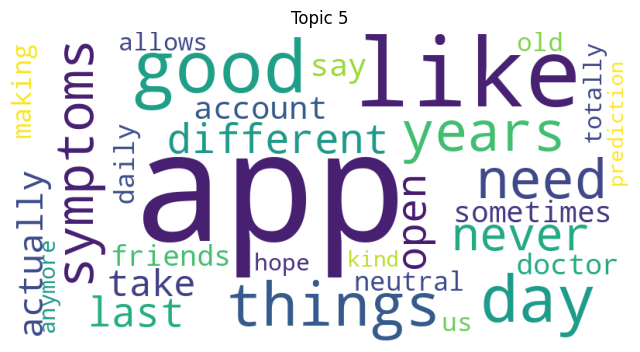

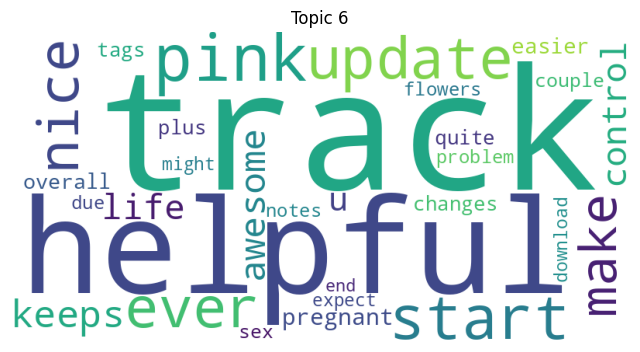

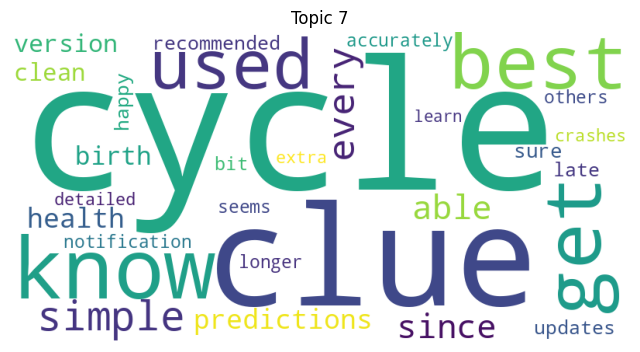

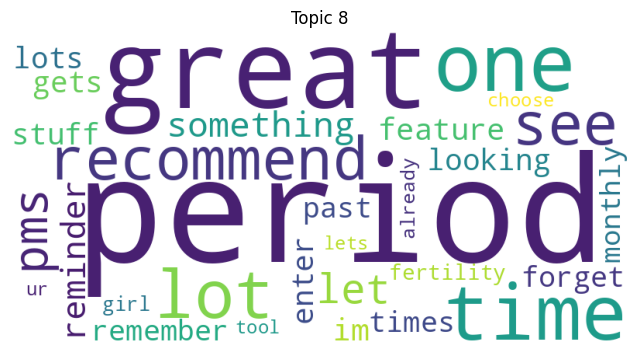

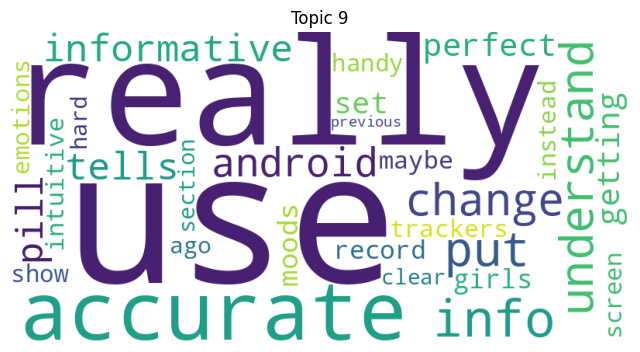

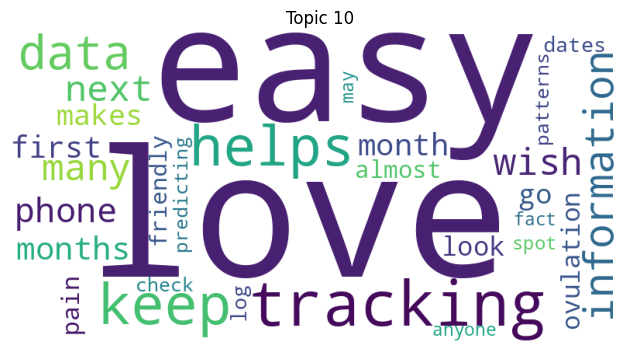

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word cloud for each topic
def plot_word_clouds(lda_model, num_topics):
    for i in range(num_topics):
        plt.figure(figsize=(8, 6))
        plt.imshow(WordCloud(width=800, height=400, random_state=42, background_color='white')
                   .fit_words(dict(lda_model.show_topic(i, 30))))
        plt.axis('off')
        plt.title(f'Topic {i + 1}')
        plt.show()

# Plot word clouds for each topic
plot_word_clouds(lda_model, num_topics=10)


In [ ]:
# Separate the dataset into low-rated (1-3) and high-rated (4-5) reviews
low_ratings_df = df[df['score'] <= 3]
high_ratings_df = df[df['score'] >= 4]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preprocess low-rated reviews
low_corpus = [dictionary.doc2bow(text) for text in low_ratings_df['tokens']]
low_lda_model = LdaModel(corpus=low_corpus, id2word=dictionary, num_topics=10, passes=15, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preprocess high-rated reviews
high_corpus = [dictionary.doc2bow(text) for text in high_ratings_df['tokens']]
high_lda_model = LdaModel(corpus=high_corpus, id2word=dictionary, num_topics=10, passes=15, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


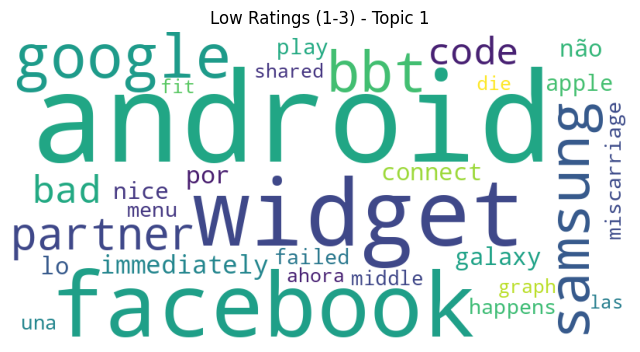

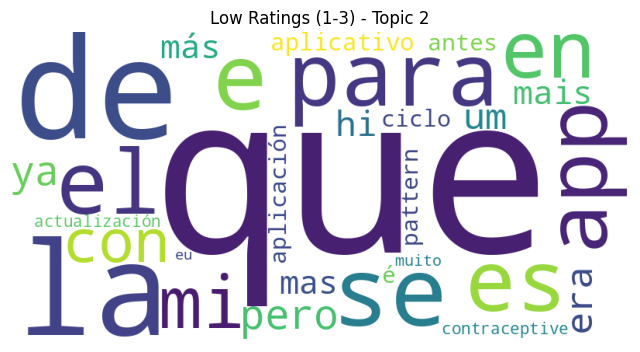

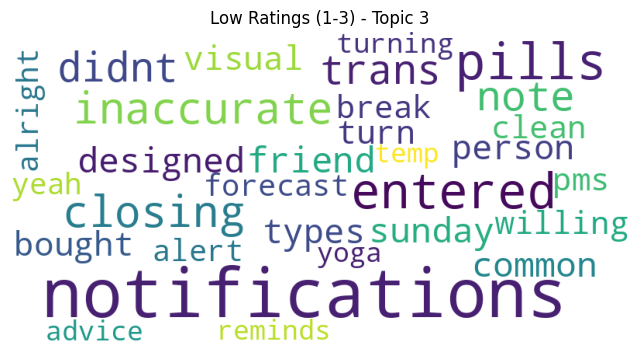

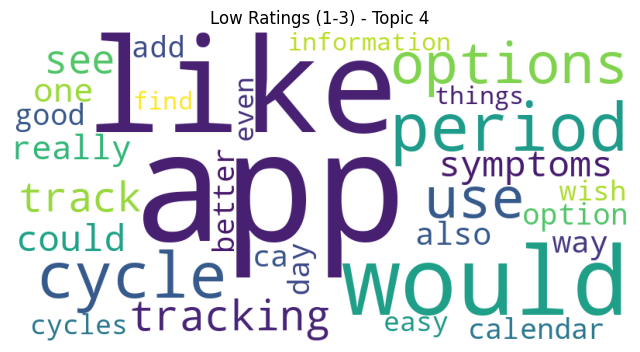

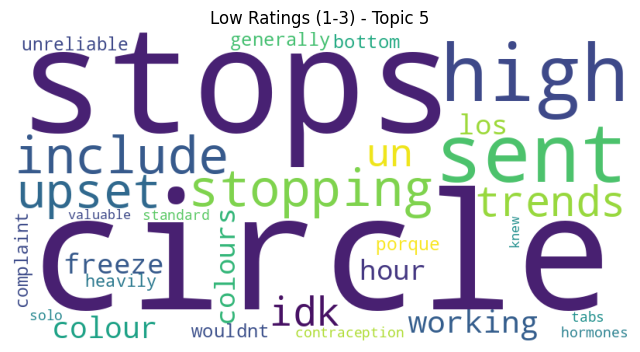

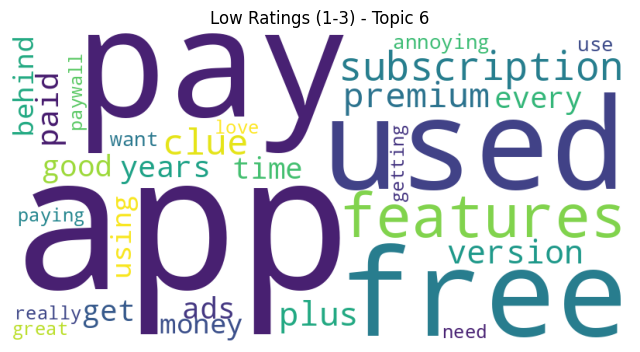

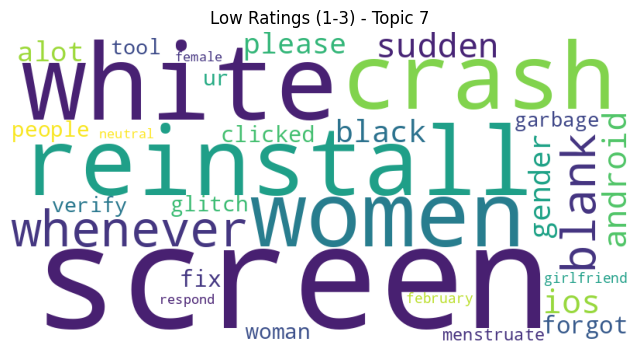

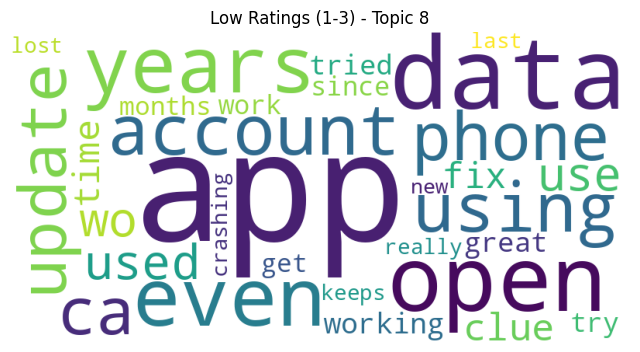

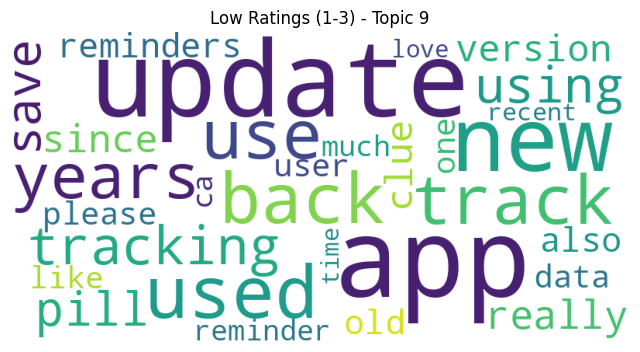

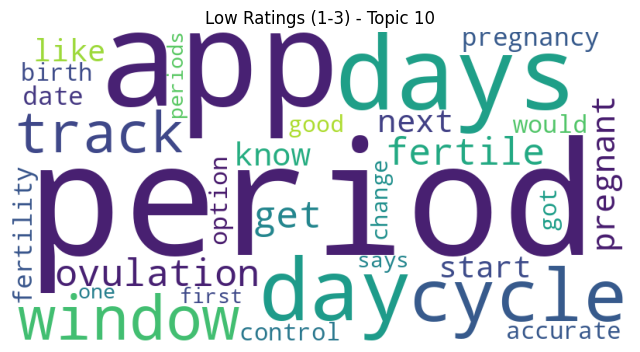

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word cloud for each topic
def plot_word_clouds(lda_model, num_topics, title):
    for i in range(num_topics):
        plt.figure(figsize=(8, 6))
        plt.imshow(WordCloud(width=800, height=400, random_state=42, background_color='white')
                   .fit_words(dict(lda_model.show_topic(i, 30))))
        plt.axis('off')
        plt.title(f'{title} - Topic {i + 1}')
        plt.show()

# Plot word clouds for low ratings
plot_word_clouds(low_lda_model, num_topics=10, title="Low Ratings (1-3)")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


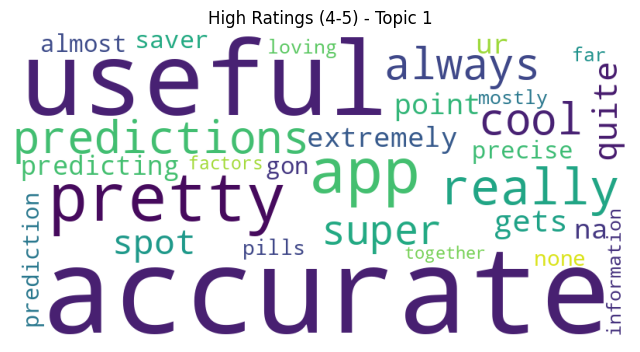

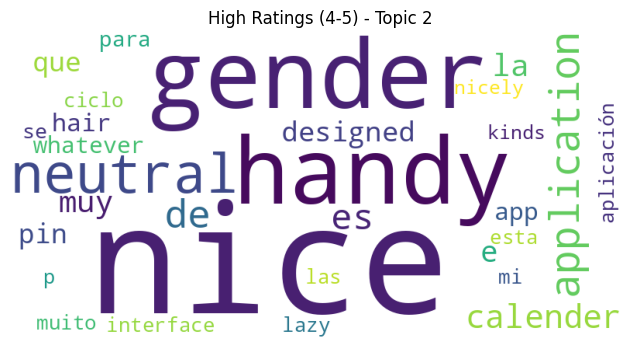

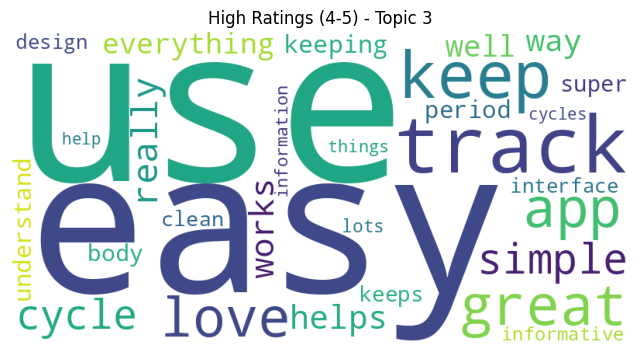

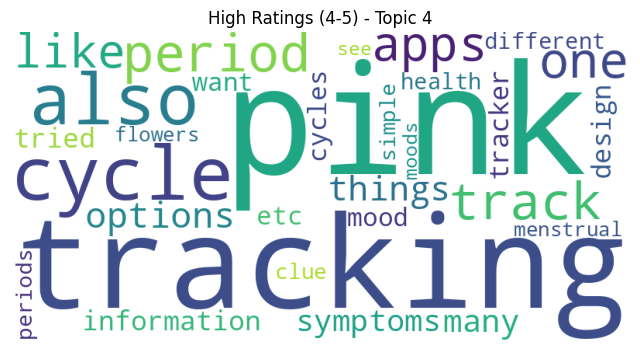

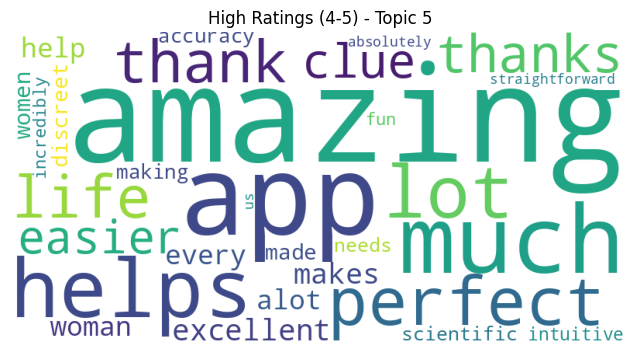

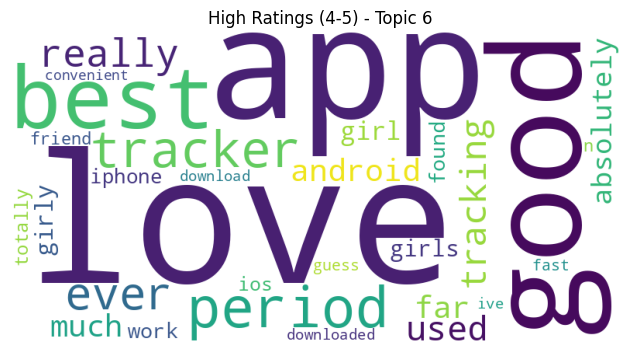

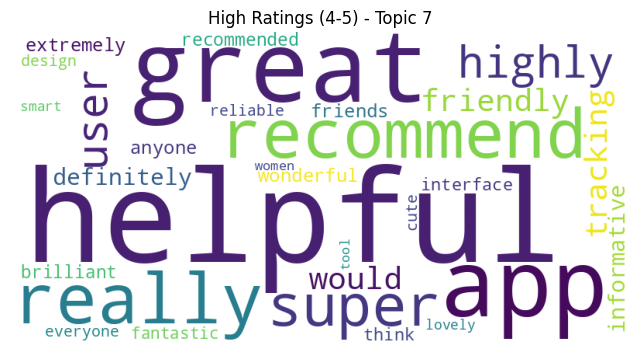

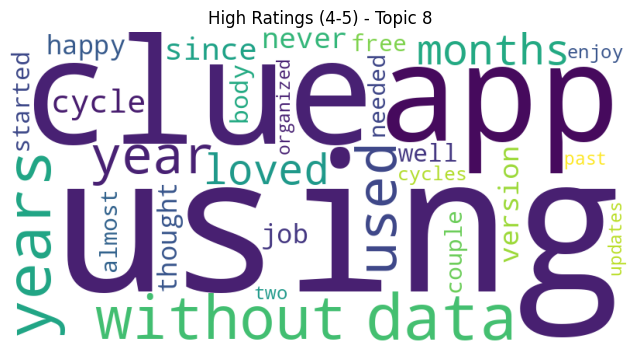

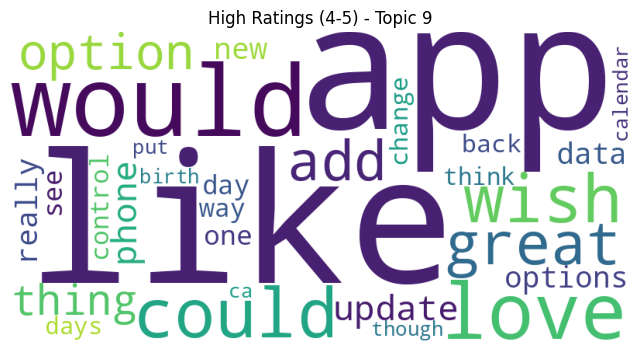

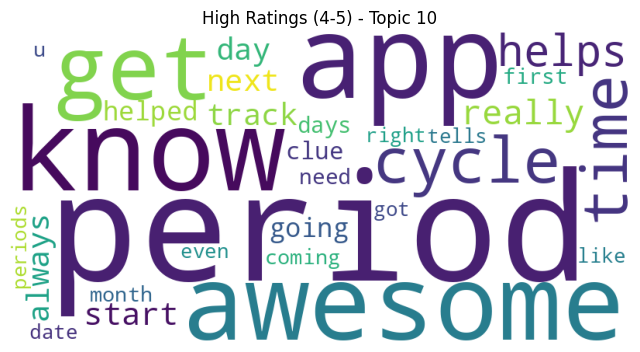

In [ ]:
# Plot word clouds for high ratings
plot_word_clouds(high_lda_model, num_topics=10, title="High Ratings (4-5)")


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare pyLDAvis for low ratings
pyLDAvis.enable_notebook()
low_lda_display = gensimvis.prepare(low_lda_model, low_corpus, dictionary)
pyLDAvis.display(low_lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prepare pyLDAvis for high ratings
high_lda_display = gensimvis.prepare(high_lda_model, high_corpus, dictionary)
pyLDAvis.display(high_lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np

# Function to calculate topic proportions for a given corpus and LDA model
def calculate_topic_proportions(lda_model, corpus, num_topics):
    topic_distribution = []
    for doc in corpus:
        doc_topics = lda_model.get_document_topics(doc, minimum_probability=0)
        doc_topics = [prob for _, prob in doc_topics]
        topic_distribution.append(doc_topics)

    # Convert to DataFrame for easier calculation
    topic_df = pd.DataFrame(topic_distribution, columns=[f"Topic {i+1}" for i in range(num_topics)])

    # Calculate average proportion for each topic
    topic_proportions = topic_df.mean().to_frame(name='Proportion').reset_index()
    topic_proportions.columns = ['Topic', 'Proportion']
    return topic_proportions

# Calculate topic proportions for low ratings
low_topic_proportions = calculate_topic_proportions(low_lda_model, low_corpus, num_topics=10)
print("Low Ratings Topic Proportions:")
print(low_topic_proportions)

# Calculate topic proportions for high ratings
high_topic_proportions = calculate_topic_proportions(high_lda_model, high_corpus, num_topics=10)
print("\nHigh Ratings Topic Proportions:")
print(high_topic_proportions)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Low Ratings Topic Proportions:
      Topic  Proportion
0   Topic 1    0.024087
1   Topic 2    0.022496
2   Topic 3    0.022808
3   Topic 4    0.174053
4   Topic 5    0.018765
5   Topic 6    0.128621
6   Topic 7    0.024114
7   Topic 8    0.237266
8   Topic 9    0.193686
9  Topic 10    0.154103

High Ratings Topic Proportions:
      Topic  Proportion
0   Topic 1    0.082898
1   Topic 2    0.042071
2   Topic 3    0.132619
3   Topic 4    0.098631
4   Topic 5    0.081815
5   Topic 6    0.134175
6   Topic 7    0.125884
7   Topic 8    0.078680
8   Topic 9    0.102452
9  Topic 10    0.120774


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


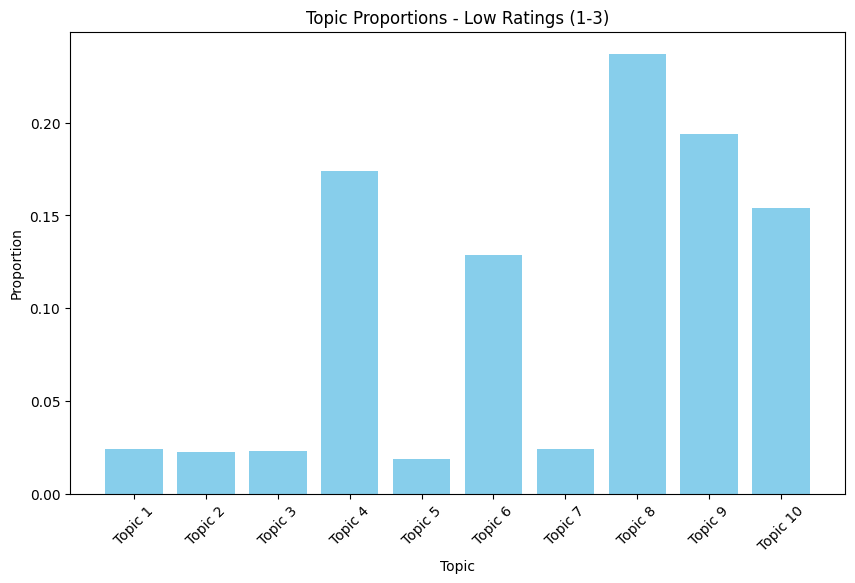

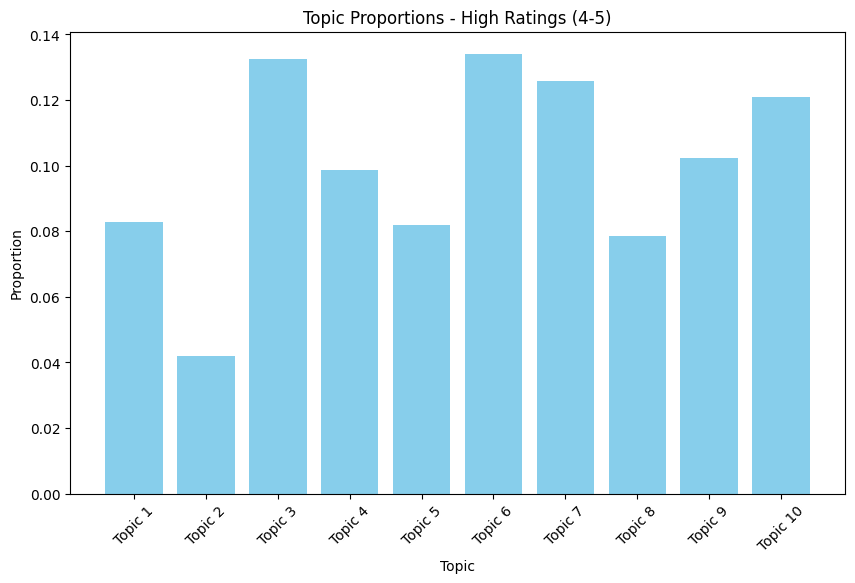

In [ ]:
import matplotlib.pyplot as plt

# Function to plot topic proportions
def plot_topic_proportions(topic_proportions, title):
    plt.figure(figsize=(10, 6))
    plt.bar(topic_proportions['Topic'], topic_proportions['Proportion'], color='skyblue')
    plt.xlabel('Topic')
    plt.ylabel('Proportion')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot topic proportions for low ratings
plot_topic_proportions(low_topic_proportions, title="Topic Proportions - Low Ratings (1-3)")

# Plot topic proportions for high ratings
plot_topic_proportions(high_topic_proportions, title="Topic Proportions - High Ratings (4-5)")


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")  # Adjust with your actual file path

# Classify reviews into two groups: Low ratings (1-3) and High ratings (4-5)
df['rating_group'] = df['score'].apply(lambda x: 'Low (1-3)' if x <= 3 else 'High (4-5)')

# Calculate the proportion of each rating group
rating_proportions = df['rating_group'].value_counts(normalize=True).to_frame(name='Proportion').reset_index()
rating_proportions.columns = ['Rating Group', 'Proportion']

print("Proportion of Low and High Ratings:")
print(rating_proportions)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Proportion of Low and High Ratings:
  Rating Group  Proportion
0   High (4-5)     0.84922
1    Low (1-3)     0.15078


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


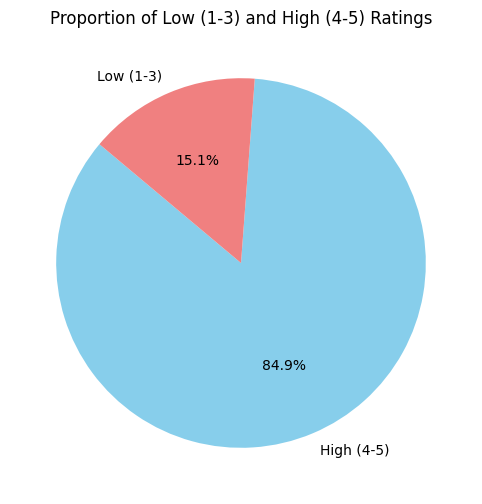

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_proportions['Proportion'], labels=rating_proportions['Rating Group'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Proportion of Low (1-3) and High (4-5) Ratings")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")  # Adjust with your actual file path

# Classify reviews into two groups based on rating: Low (1-3) and High (4-5)
df['rating_group'] = df['score'].apply(lambda x: 'Low (1-3)' if x <= 3 else 'High (4-5)')

# Check if there's a reply: True if replycontent is not empty or NaN, else False
df['has_reply'] = df['replyContent'].notna()

# Calculate the proportion of replies for each rating group
reply_proportion = df.groupby('rating_group')['has_reply'].mean().reset_index()
reply_proportion.columns = ['Rating Group', 'Proportion of Replies']

print("Proportion of Replies by Rating Group:")
print(reply_proportion)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Proportion of Replies by Rating Group:
  Rating Group  Proportion of Replies
0   High (4-5)               0.050234
1    Low (1-3)               0.787550


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


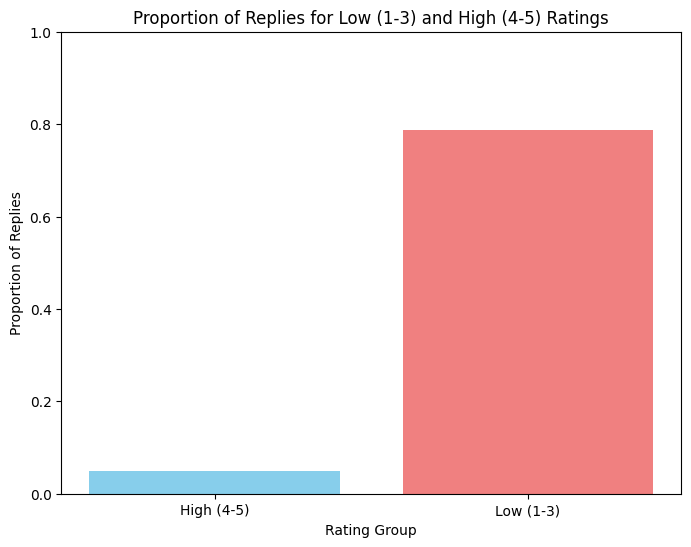

In [ ]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(reply_proportion['Rating Group'], reply_proportion['Proportion of Replies'], color=['skyblue', 'lightcoral'])
plt.xlabel("Rating Group")
plt.ylabel("Proportion of Replies")
plt.title("Proportion of Replies for Low (1-3) and High (4-5) Ratings")
plt.ylim(0, 1)  # Set y-axis limit to 1 for percentage visualization
plt.show()


In [ ]:
import pandas as pd
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Hsh/clue.csv")  # Adjust with your actual file path

# Filter for reviews with replies only
df = df[df['replyContent'].notna()]

# Define rating groups
df['rating_group'] = df['score'].apply(lambda x: 'Low (1-3)' if x <= 3 else 'High (4-5)')

# Preprocessing function
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing to content
df['tokens'] = df['content'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def lda_topic_modeling(tokens, num_topics=10, num_words=5):
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(text) for text in tokens]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    topics = lda_model.print_topics(num_words=num_words)
    return topics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Separate tokens by rating group
low_rating_tokens = df[df['rating_group'] == 'Low (1-3)']['tokens'].tolist()
high_rating_tokens = df[df['rating_group'] == 'High (4-5)']['tokens'].tolist()

# Run LDA for low-rated reviews with replies
low_rating_topics = lda_topic_modeling(low_rating_tokens)
print("Topics for Low-Rated Reviews with Replies:")
for idx, topic in enumerate(low_rating_topics):
    print(f"Topic {idx+1}: {topic}")

# Run LDA for high-rated reviews with replies
high_rating_topics = lda_topic_modeling(high_rating_tokens)
print("\nTopics for High-Rated Reviews with Replies:")
for idx, topic in enumerate(high_rating_topics):
    print(f"Topic {idx+1}: {topic}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for Low-Rated Reviews with Replies:
Topic 1: (0, '0.037*"app" + 0.020*"update" + 0.015*"new" + 0.013*"like" + 0.013*"use"')
Topic 2: (1, '0.078*"app" + 0.034*"open" + 0.019*"even" + 0.018*"wo" + 0.017*"phone"')
Topic 3: (2, '0.029*"data" + 0.016*"lost" + 0.013*"app" + 0.010*"age" + 0.009*"e"')
Topic 4: (3, '0.101*"account" + 0.028*"data" + 0.021*"delete" + 0.020*"cant" + 0.018*"sign"')
Topic 5: (4, '0.053*"app" + 0.019*"used" + 0.019*"pay" + 0.017*"features" + 0.017*"free"')
Topic 6: (5, '0.072*"app" + 0.043*"data" + 0.022*"years" + 0.019*"gone" + 0.017*"uninstalled"')
Topic 7: (6, '0.038*"control" + 0.036*"birth" + 0.022*"hate" + 0.019*"internet" + 0.016*"option"')
Topic 8: (7, '0.064*"period" + 0.036*"app" + 0.025*"cycle" + 0.023*"days" + 0.019*"day"')
Topic 9: (8, '0.036*"que" + 0.031*"de" + 0.026*"la" + 0.017*"didnt" + 0.014*"se"')
Topic 10: (9, '0.030*"na" + 0.018*"bad" + 0.016*"gon" + 0.013*"wan" + 0.010*"asks"')

Topics for High-Rated Reviews with Replies:
Topic 1: (0, '0

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# Prepare and visualize topics for low-rated reviews
dictionary_low = Dictionary(low_rating_tokens)
corpus_low = [dictionary_low.doc2bow(text) for text in low_rating_tokens]
lda_low = LdaModel(corpus_low, num_topics=10, id2word=dictionary_low, passes=10)
vis_low = pyLDAvis.gensim_models.prepare(lda_low, corpus_low, dictionary_low)
pyLDAvis.display(vis_low)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prepare and visualize topics for high-rated reviews
dictionary_high = Dictionary(high_rating_tokens)
corpus_high = [dictionary_high.doc2bow(text) for text in high_rating_tokens]
lda_high = LdaModel(corpus_high, num_topics=10, id2word=dictionary_high, passes=10)
vis_high = pyLDAvis.gensim_models.prepare(lda_high, corpus_high, dictionary_high)
pyLDAvis.display(vis_high)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


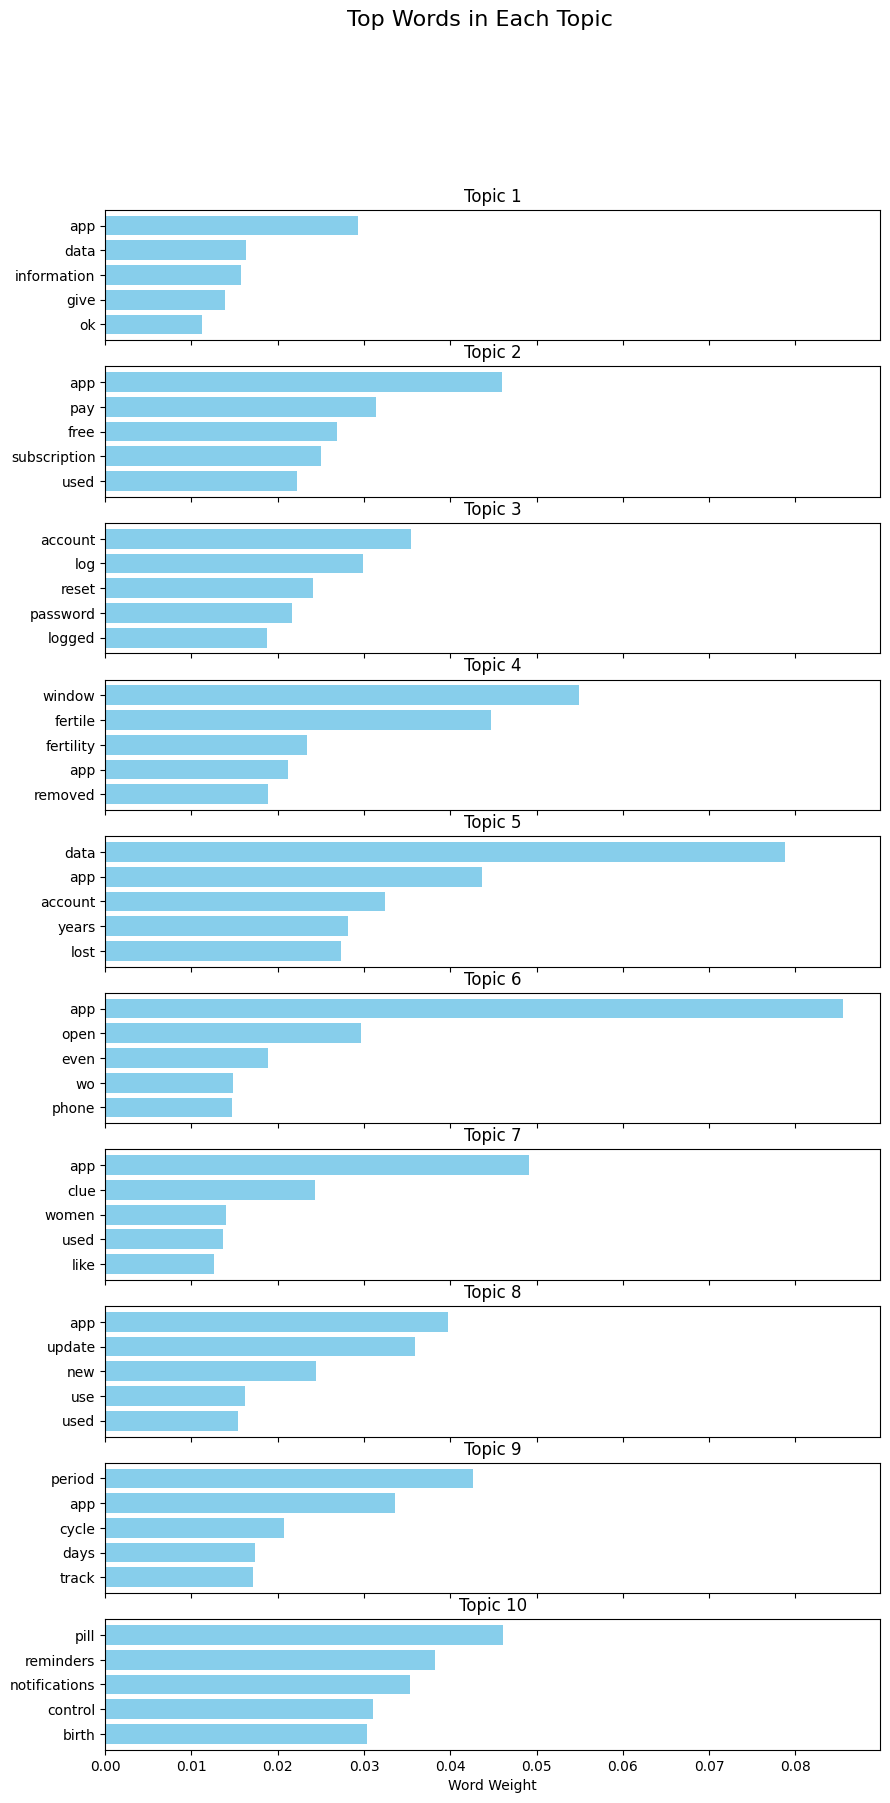

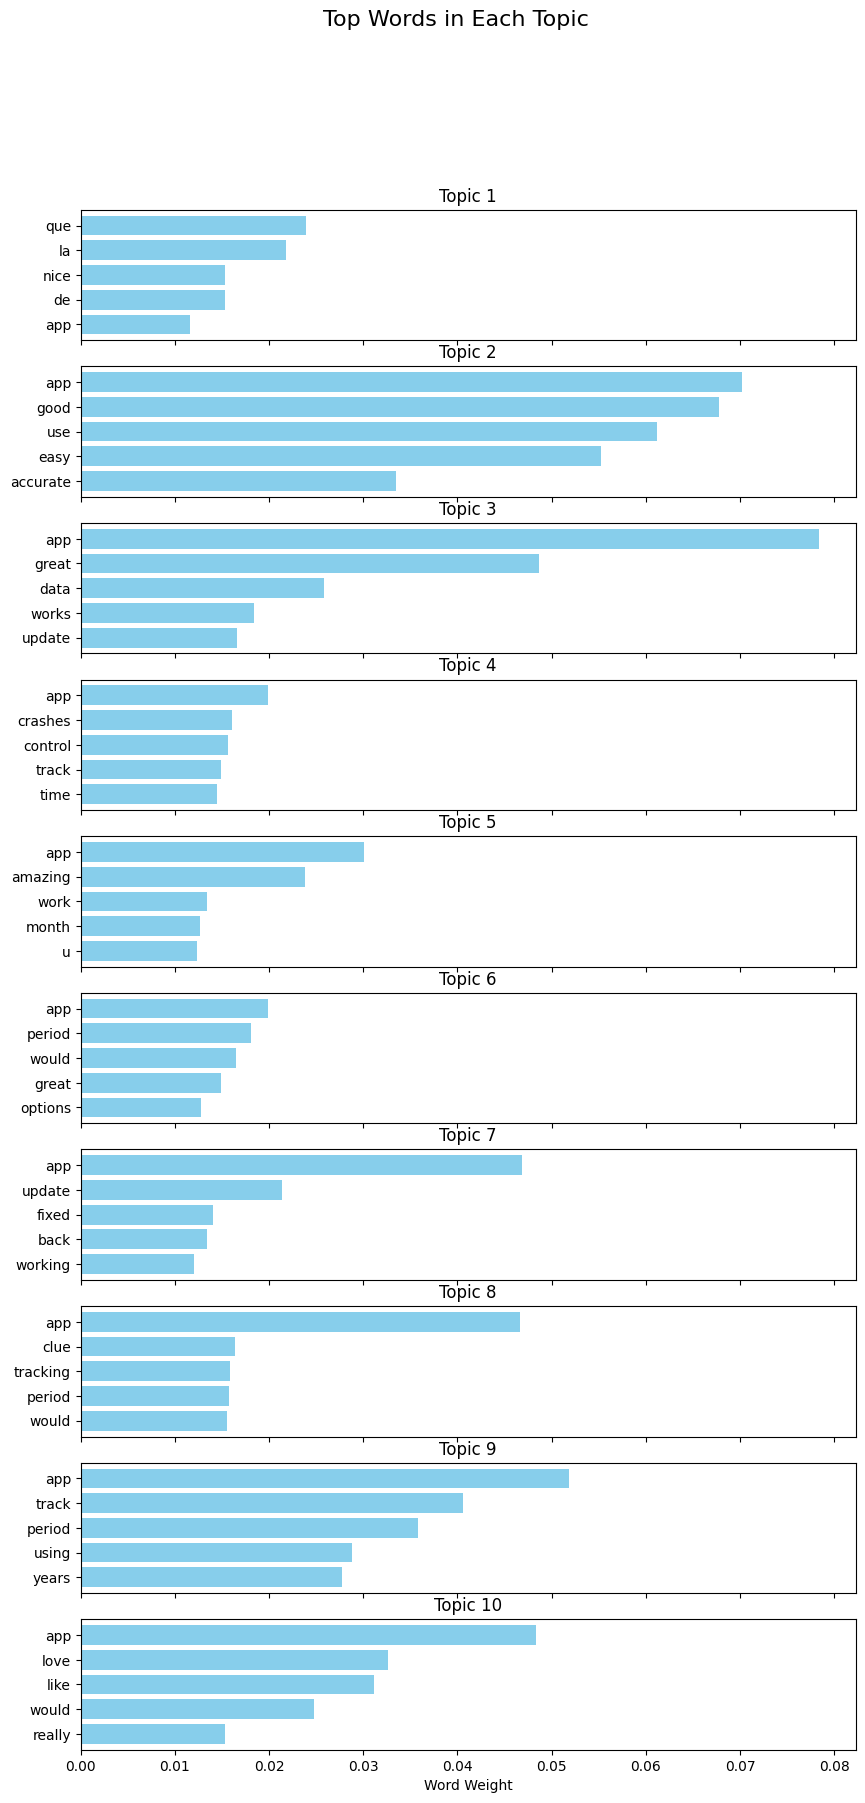

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, num_topics, num_words=5):
    fig, axes = plt.subplots(num_topics, 1, figsize=(10, 20), sharex=True)
    fig.suptitle("Top Words in Each Topic", fontsize=16)
    topics = lda_model.show_topics(formatted=False)

    for i, (topic_idx, topic) in enumerate(topics):
        top_words = dict(topic[:num_words])
        words = list(top_words.keys())
        weights = list(top_words.values())

        axes[i].barh(words, weights, color='skyblue')
        axes[i].invert_yaxis()
        axes[i].set_title(f"Topic {topic_idx + 1}")

    plt.xlabel("Word Weight")
    plt.show()

# For low-rated reviews with replies
plot_top_words(lda_low, num_topics=10)

# For high-rated reviews with replies
plot_top_words(lda_high, num_topics=10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


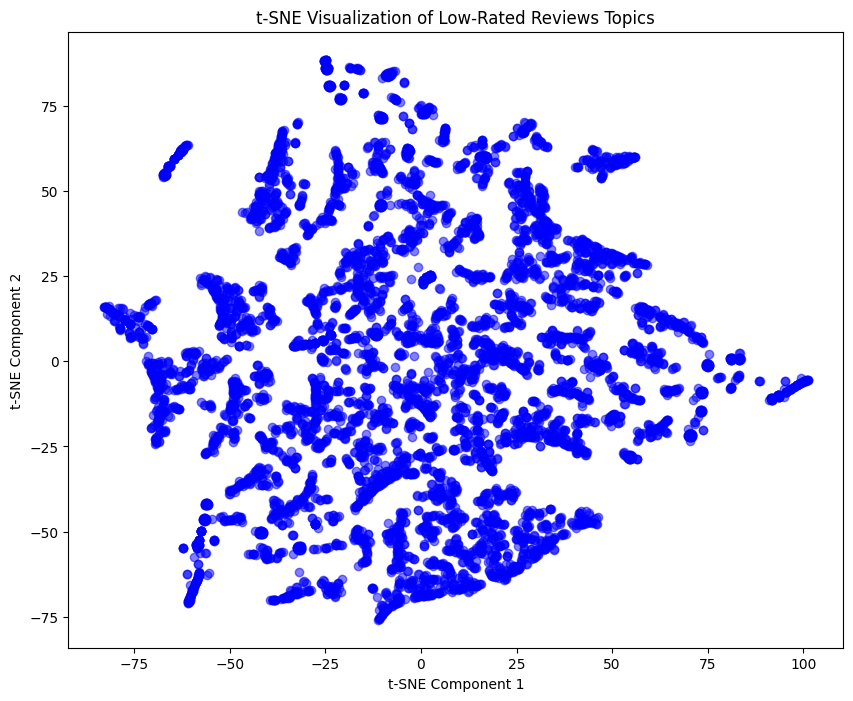

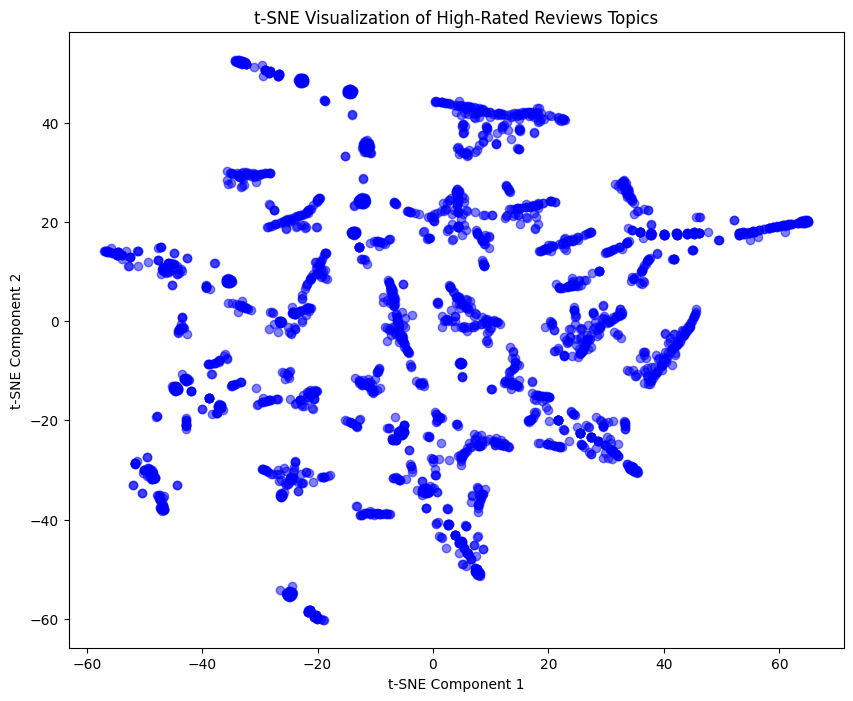

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_visualization(lda_model, corpus, num_topics, title):
    # Get topic distributions for each document in the corpus
    topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

    # Create a matrix with topic proportions for each document
    topic_matrix = np.zeros((len(corpus), num_topics))
    for i, dist in enumerate(topic_distributions):
        for topic_num, prop in dist:
            topic_matrix[i, topic_num] = prop

    # Apply t-SNE for dimensionality reduction to 2D
    tsne_model = TSNE(n_components=2, random_state=42)
    tsne_results = tsne_model.fit_transform(topic_matrix)

    # Create a scatter plot of the t-SNE results
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='b', alpha=0.5)
    plt.title(f't-SNE Visualization of {title} Topics')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# For low-rated reviews (1-3)
tsne_visualization(lda_low, corpus_low, num_topics=10, title="Low-Rated Reviews")

# For high-rated reviews (4-5)
tsne_visualization(lda_high, corpus_high, num_topics=10, title="High-Rated Reviews")


In [ ]:
!pip install afinn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=04b1da4dc587d41a9b46eea6911e1b28d77071853fe72a922a4264c597be3bc8
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn
import pandas as pd

# Initialize AFINN sentiment analyzer
afinn = Afinn()

# Function to classify sentiment based on AFINN score
def sentiment_analysis_afinn(text):
    if isinstance(text, str):  # Only process text (avoid issues with non-text data)
        score = afinn.score(text)
        return score
    return 0.0  # Default to neutral sentiment if no valid text

# Apply sentiment analysis to both 'content' and 'replycontent'
df['review_sentiment_afinn'] = df['content'].apply(sentiment_analysis_afinn)
df['reply_sentiment_afinn'] = df['replyContent'].apply(sentiment_analysis_afinn)

# Classify sentiment into positive, neutral, negative
def classify_sentiment_afinn(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['review_sentiment_afinn_label'] = df['review_sentiment_afinn'].apply(classify_sentiment_afinn)
df['reply_sentiment_afinn_label'] = df['reply_sentiment_afinn'].apply(classify_sentiment_afinn)

# Now, categorize based on rating
df['rating_category'] = df['score'].apply(lambda x: 'Low' if x <= 3 else 'High')

# Create a DataFrame to summarize sentiment by rating category and topic
low_rated_reviews = df[df['rating_category'] == 'Low']
high_rated_reviews = df[df['rating_category'] == 'High']

# Check for replies with sentiment
low_rated_reviews_with_replies = low_rated_reviews[low_rated_reviews['reply_sentiment_afinn_label'] != 'Neutral']
high_rated_reviews_with_replies = high_rated_reviews[high_rated_reviews['reply_sentiment_afinn_label'] != 'Neutral']

# Display top rows for sentiment analysis result
low_rated_reviews_with_replies[['content', 'score', 'review_sentiment_afinn_label', 'replyContent', 'reply_sentiment_afinn_label']].head(), high_rated_reviews_with_replies[['content', 'score', 'review_sentiment_afinn_label', 'replyContent', 'reply_sentiment_afinn_label']].head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(                                             content  score  \
 0  The unskippable ads for Clue Plus every time y...      1   
 2                                           not good      1   
 6   Unskippable self-advertising that is in the way.      1   
 7  Haven't used it yet because of the age restric...      1   
 9                        Period tracking off point 😔      2   
 
   review_sentiment_afinn_label  \
 0                     Negative   
 2                     Negative   
 6                      Neutral   
 7                     Negative   
 9                      Neutral   
 
                                         replyContent  \
 0  Hello, we understand you’re disappointed about...   
 2  Hey, thanks for your review. We’re sorry to he...   
 6  Hey, thanks for your review. We’re sorry to he...   
 7  Hey, thanks for reaching out. The reason why y...   
 9  Hey, thanks for getting in touch. We’re sorry ...   
 
   reply_sentiment_afinn_label  
 0                    Neg

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data if not already present
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords
        return " ".join(tokens)
    else:
        return ""  # If not a string, return an empty string (or handle accordingly)

# Applying preprocessing to your dataset
low_rated_reviews['content_processed'] = low_rated_reviews['content'].apply(preprocess_text)
high_rated_reviews['content_processed'] = high_rated_reviews['content'].apply(preprocess_text)

# Ensure that the 'content' column exists and preprocess it
df['content_processed'] = df['content'].apply(lambda x: preprocess_text(str(x)))  # Convert to string if NaN

# Check if the 'content_processed' column is successfully created
print(df[['content', 'content_processed']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-53-c75e15770478>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

                                             content  \
0  The unskippable ads for Clue Plus every time y...   
1                                      very nicr app   
2                                           not good   
3  Splendid found it helpful hope it'll help me h...   
4  Clue just keeps getting better and better. Mor...   

                                   content_processed  
0  unskippable ads clue plus every time use app r...  
1                                           nicr app  
2                                               good  
3              splendid found helpful hope help baby  
4  clue keeps getting better better symptoms choo...  


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the reviews for topic modeling
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content_processed'])

# Perform LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for number of topics
lda_topics = lda.fit_transform(X)

# Assign the most probable topic for each review
df['topic'] = lda_topics.argmax(axis=1)  # Assigning the topic with the highest probability

# Checking the top words for each topic
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Top 10 words for each topic
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
['mi', 'pero', 'en', 'para', 'el', 'se', 'es', 'app', 'la', 'que']

Topic 1:
['ca', 'open', 'use', 'update', 'clue', 'used', 'using', 'years', 'data', 'app']

Topic 2:
['muito', 'eu', 'um', 'que', 'wrong', 'bad', 'mais', 'não', 'excellent', 'good']

Topic 3:
['version', 'save', 'like', 'use', 'used', 'track', 'tracking', 'new', 'update', 'app']

Topic 4:
['really', 'day', 'use', 'tracking', 'days', 'like', 'track', 'cycle', 'period', 'app']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x600 with 0 Axes>

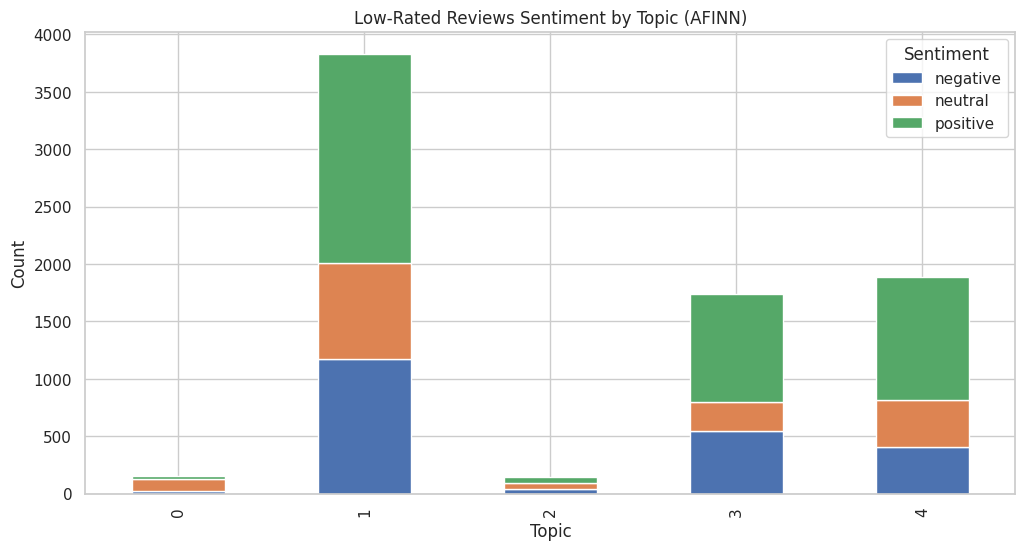

<Figure size 1200x600 with 0 Axes>

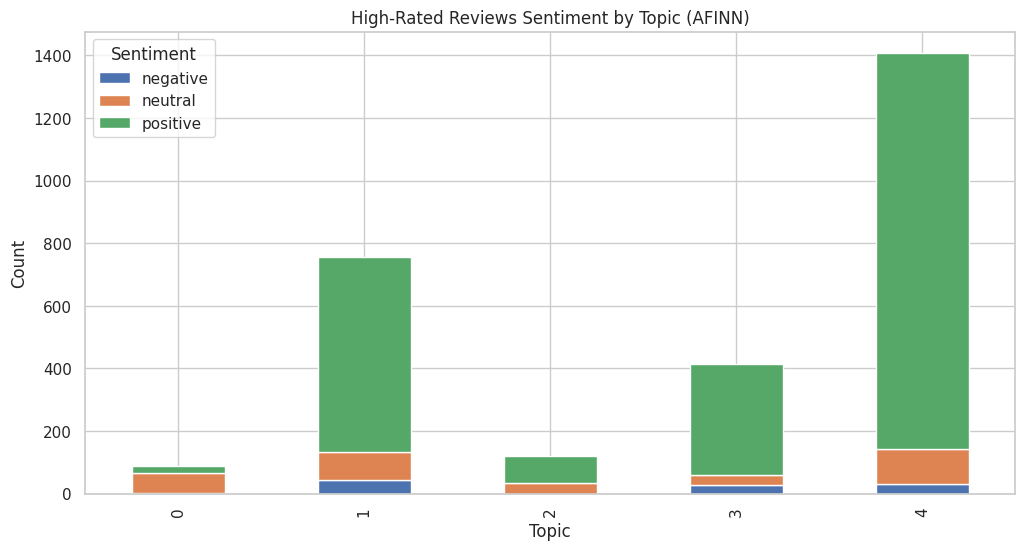

Low-Rated Reviews Sentiment Scores:
        count      mean       std   min  25%  50%  75%   max
topic                                                       
0       155.0 -0.096774  1.999267  -8.0  0.0  0.0  0.0   6.0
1      3833.0  0.861466  3.613267 -17.0 -1.0  0.0  3.0  26.0
2       143.0  0.314685  2.707370 -12.0 -0.5  0.0  3.0  10.0
3      1737.0  1.227404  4.198775 -17.0 -1.0  1.0  4.0  19.0
4      1887.0  1.821410  3.818025 -12.0  0.0  1.0  4.0  25.0

High-Rated Reviews Sentiment Scores:
        count      mean       std  min  25%  50%  75%   max
topic                                                      
0        89.0  1.146067  2.376737 -4.0  0.0  0.0  3.0  12.0
1       757.0  3.533686  3.541588 -7.0  2.0  3.0  5.0  22.0
2       121.0  2.231405  1.558634  0.0  0.0  3.0  3.0   7.0
3       413.0  4.438257  4.150586 -6.0  2.0  3.0  7.0  19.0
4      1406.0  4.605263  3.894875 -5.0  2.0  4.0  6.0  26.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from afinn import Afinn

# Initialize AFINN sentiment analyzer
afinn = Afinn()

# Apply AFINN sentiment analysis to the reviews
df['sentiment_score_afinn'] = df['content_processed'].apply(lambda x: afinn.score(x))

# Categorize sentiment into labels (positive, negative, neutral) based on AFINN score
def sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['review_sentiment_afinn_label'] = df['sentiment_score_afinn'].apply(sentiment_label)

# Set plot style
sns.set(style="whitegrid")

# Function to plot sentiment distribution by topic
def plot_sentiment_by_topic_afinn(df, title):
    # Visualize the sentiment distribution by topic and sentiment label
    plt.figure(figsize=(12, 6))
    sentiment_counts = df.groupby(['topic', 'review_sentiment_afinn_label']).size().unstack().fillna(0)
    sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xlabel('Topic')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Sentiment')
    plt.show()

# Plot sentiment distribution for low-rated reviews with replies
low_rated_reviews_with_replies = df[df['score'] <= 3]  # Assuming 'score' is the rating column
plot_sentiment_by_topic_afinn(low_rated_reviews_with_replies, "Low-Rated Reviews Sentiment by Topic (AFINN)")

# Plot sentiment distribution for high-rated reviews with replies
high_rated_reviews_with_replies = df[df['score'] > 3]  # Assuming 'score' is the rating column
plot_sentiment_by_topic_afinn(high_rated_reviews_with_replies, "High-Rated Reviews Sentiment by Topic (AFINN)")

# Display sentiment scores table for low and high-rated reviews
low_sentiment_scores = low_rated_reviews_with_replies.groupby(['topic'])['sentiment_score_afinn'].describe()
high_sentiment_scores = high_rated_reviews_with_replies.groupby(['topic'])['sentiment_score_afinn'].describe()

print("Low-Rated Reviews Sentiment Scores:")
print(low_sentiment_scores)
print("\nHigh-Rated Reviews Sentiment Scores:")
print(high_sentiment_scores)
